라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

파일 불러오기

In [9]:
smart_farm = pd.read_csv("smart_farm.csv")
columns = pd.read_csv("(스마트팜)테이블 정의서.csv")

In [10]:
smart_farm.head(3)

,smart_farm.yy,smart_farm.mm,smart_farm.dd,smart_farm.hh,smart_farm.nn,smart_farm.insolation,smart_farm.out_tmperature,smart_farm.out_humidity,smart_farm.wind_speed,smart_farm.wind_direction,...,smart_farm.shield_tmperature_h,smart_farm.shield_energy_h,smart_farm.shield_energy_v,smart_farm.exhaust_fan,smart_farm.ceiling,smart_farm.floating_fan,smart_farm.fan_coil_b_site,smart_farm.ventilation_temperature_control,smart_farm.heating_temperature_set_up,smart_farm.heat_supply
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


컬럼명 재정의

In [16]:
columns

,변수명,정의
0,yy,년도
1,mm,월
2,dd,일
3,hh,시
4,nn,분
5,insolation,일사량(W/㎡)
6,out_tmperature,외기온(℃)
7,out_humidity,외기습도(%)
8,wind_speed,풍속(m/s)
9,wind_direction,풍향(º)


In [12]:
smart_farm.columns = list(columns["정의"])
smart_farm.head()

,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),풍속(m/s),풍향(º),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021,11,26,0,0,-2.7,5.8,67,0.0,325,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021,11,26,0,1,-2.9,5.8,67,0.4,344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021,11,26,0,2,-3.0,5.7,67,0.9,105,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021,11,26,0,3,-3.0,5.7,67,1.3,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021,11,26,0,4,-2.8,5.7,67,0.9,123,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


In [15]:
smart_farm["일사량(W/㎡)"].describe()

count    132480.000000
mean        138.804026
std         216.967847
min          -5.500000
25%          -3.300000
50%          -2.500000
75%         256.000000
max         884.000000
Name: 일사량(W/㎡), dtype: float64

### Datetime 생성
- 년 월 일 시 분 합치기
- 링크 : https://www.daleseo.com/python-datetime/

In [6]:
time_lst = []
ymd_lst = []

for idx, row in smart_farm.iterrows():
    date = datetime(int(row["년도"]), int(row["월"]), int(row["일"]), int(row["시"]), int(row["분"]))
    time_lst.append(date)
    
    ymd = datetime(int(row["년도"]), int(row["월"]), int(row["일"]))
    ymd_lst.append(ymd)
    
smart_farm["시간"] = time_lst
smart_farm["년월일"] = ymd_lst

In [7]:
smart_farm = smart_farm[["시간","년월일","년도",'월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)', '풍속(m/s)',
       '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)', '에너지스크린(수평)',
       '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '환기온도(천창 제어온도)',
       '난방온도(설정온도)', '열공급량(kWh)']]

In [8]:
smart_farm.columns

Index(['시간', '년월일', '년도', '월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(kWh)'],
      dtype='object')

시간 column -> 고유 PK로 설정가능

In [9]:
smart_farm[smart_farm["시간"].duplicated()]

smart_farm_df = smart_farm.set_index("시간")

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132475,2022-02-28 23:55:00,2022-02-28,2022,2,28,23,55,-2.7,4.1,51,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
132476,2022-02-28 23:56:00,2022-02-28,2022,2,28,23,56,-2.7,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132477,2022-02-28 23:57:00,2022-02-28,2022,2,28,23,57,-2.7,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
132478,2022-02-28 23:58:00,2022-02-28,2022,2,28,23,58,-2.6,4.1,52,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8


### 결측치 확인
- y값 결측 확인
- x값 결측 확인

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [11]:
smart_farm.isnull().sum()

시간                   0
년월일                  0
년도                   0
월                    0
일                    0
시                    0
분                    0
일사량(W/㎡)             0
외기온(℃)               0
외기습도(%)              0
풍속(m/s)              0
풍향(º)                0
내부 온도              512
내부 습도              512
차광스크린(수평)          512
차열스크린(수평)          512
에너지스크린(수평)         512
에너지스크린(수직)         512
배기팬                512
천창                 512
유동팬                512
팬코일 B동             512
환기온도(천창 제어온도)      501
난방온도(설정온도)         500
열공급량(kWh)        21075
dtype: int64

### 1) y값 결측치 확인
- 검증데이터와 학습데이터 분리
- 검증기간 : 2021.12.26~2022.01.01(1주)
- 검증기간 : 2022.01.23~2022.01.29(1주)

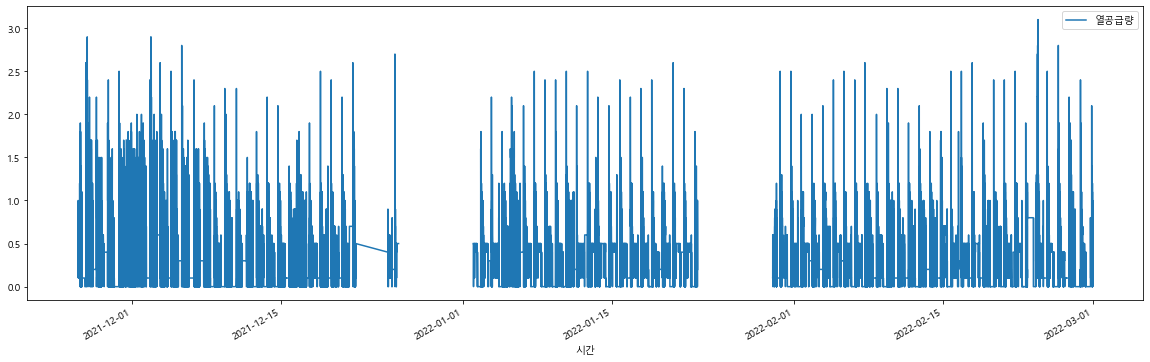

In [12]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
smart_farm_df["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

학습데이터와 검증데이터분리
- datetime 날짜구간 행 출력 : https://www.delftstack.com/ko/howto/python-pandas/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
- datetime to str : https://www.programiz.com/python-programming/datetime/strftime

In [13]:
range1 = pd.date_range(start="2021-12-26",end="2022-01-01")
range2 = pd.date_range(start="2022-01-23",end="2022-01-29")

smart_farm_df = smart_farm_df.reset_index()

In [14]:
smart_farm_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


검증용 데이터
- 12월 26일 ~ 1월 1일(1주) 예측용
- 1월 23일 ~ 1월 29일(1주) 예측용

In [15]:
test_df = smart_farm_df[(smart_farm_df["년월일"].isin(range1)) | (smart_farm_df["년월일"].isin(range2))]
test_df.reset_index(drop=True,inplace=True)
test_df

# 20160개의 데이터

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-12-26 00:00:00,2021-12-26,2021,12,26,0,0,-3.2,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
1,2021-12-26 00:01:00,2021-12-26,2021,12,26,0,1,-3.4,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
2,2021-12-26 00:02:00,2021-12-26,2021,12,26,0,2,-3.3,-5.9,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
3,2021-12-26 00:03:00,2021-12-26,2021,12,26,0,3,-3.3,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
4,2021-12-26 00:04:00,2021-12-26,2021,12,26,0,4,-3.6,-6.0,34,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,2022-01-29 23:55:00,2022-01-29,2022,1,29,23,55,-2.1,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20156,2022-01-29 23:56:00,2022-01-29,2022,1,29,23,56,-2.2,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20157,2022-01-29 23:57:00,2022-01-29,2022,1,29,23,57,-2.3,1.7,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
20158,2022-01-29 23:58:00,2022-01-29,2022,1,29,23,58,-2.3,1.6,33,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


학습용 데이터
- 특정 행만 제거하기

In [16]:
train_df = smart_farm_df[(-smart_farm_df["년월일"].isin(range1)) & (-smart_farm_df["년월일"].isin(range2))]
train_df.reset_index(drop=True,inplace=True)
train_df.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9
3,2021-11-26 00:03:00,2021-11-26,2021,11,26,0,3,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.8
4,2021-11-26 00:04:00,2021-11-26,2021,11,26,0,4,-2.8,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,1.0


학습용 데이터 null 값 확인

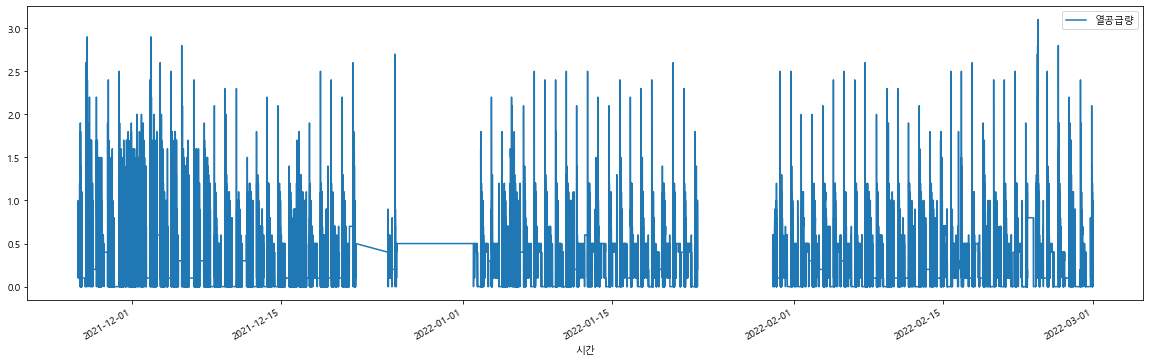

In [17]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
train_df.set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

In [18]:
# Y값이 결측인 행 915개
len(train_df[train_df["열공급량(kWh)"].isnull()])

915

결측치가 존재하는 년월일 추출하기
- 해당 년월일의 데이터들만 확인하기
- 결측치와 공존하는 데이터가 어떤 양상인지
- null_ymd_df : 결측이 존재하는 년월일 데이터 전부

In [19]:
# null_ymd : 결측이 존재하는 년월일 리스트
null_ymd = train_df[train_df["열공급량(kWh)"].isnull()]["년월일"].value_counts().index
null_ymd

DatetimeIndex(['2022-02-19', '2022-02-26', '2021-12-17', '2022-01-20',
               '2022-01-30', '2022-02-12', '2022-01-18', '2021-12-15',
               '2022-02-18', '2022-02-20', '2022-02-21', '2022-02-22',
               '2021-12-16', '2021-11-30', '2021-12-19', '2022-02-07',
               '2022-01-09', '2022-01-10', '2022-02-05', '2021-11-27'],
              dtype='datetime64[ns]', freq=None)

In [20]:
null_ymd_df = smart_farm_df[(smart_farm_df["년월일"].isin(null_ymd))]
null_ymd_df.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
1440,2021-11-27 00:00:00,2021-11-27,2021,11,27,0,0,-3.4,2.0,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4
1441,2021-11-27 00:01:00,2021-11-27,2021,11,27,0,1,-3.2,2.1,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4
1442,2021-11-27 00:02:00,2021-11-27,2021,11,27,0,2,-3.3,2.0,74,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.4


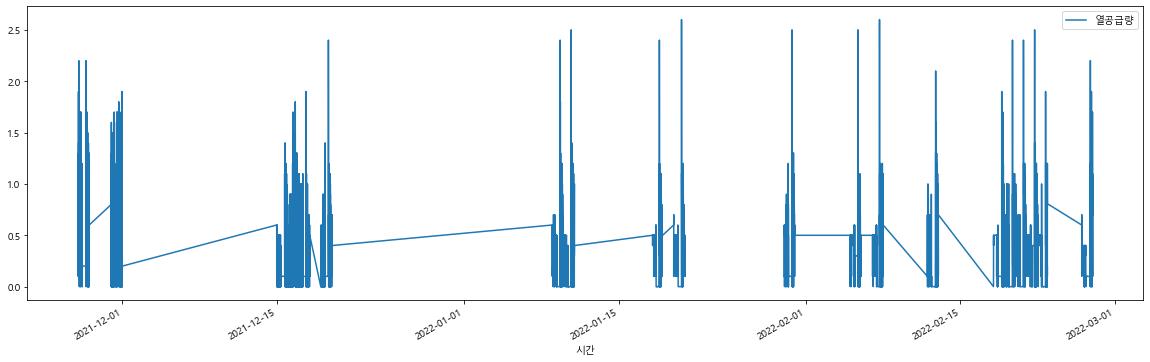

In [21]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
null_ymd_df.set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
plt.legend()

# 결측 발생 패턴이 존재하나..?

2월 19일 결측치 확인

In [22]:
null_ymd_df[(null_ymd_df["년월일"] == "2022-02-19") & (null_ymd_df["열공급량(kWh)"].isnull())]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
118160,2022-02-19 01:20:00,2022-02-19,2022,2,19,1,20,-2.6,0.5,63,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118161,2022-02-19 01:21:00,2022-02-19,2022,2,19,1,21,-2.6,0.4,64,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118162,2022-02-19 01:22:00,2022-02-19,2022,2,19,1,22,-2.6,0.4,64,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118163,2022-02-19 01:23:00,2022-02-19,2022,2,19,1,23,-2.5,0.4,65,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
118164,2022-02-19 01:24:00,2022-02-19,2022,2,19,1,24,-2.6,0.4,65,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119515,2022-02-19 23:55:00,2022-02-19,2022,2,19,23,55,-2.4,1.6,46,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119516,2022-02-19 23:56:00,2022-02-19,2022,2,19,23,56,-2.4,1.6,46,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119517,2022-02-19 23:57:00,2022-02-19,2022,2,19,23,57,-2.6,1.6,47,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN
119518,2022-02-19 23:58:00,2022-02-19,2022,2,19,23,58,-2.7,1.5,47,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,NaN


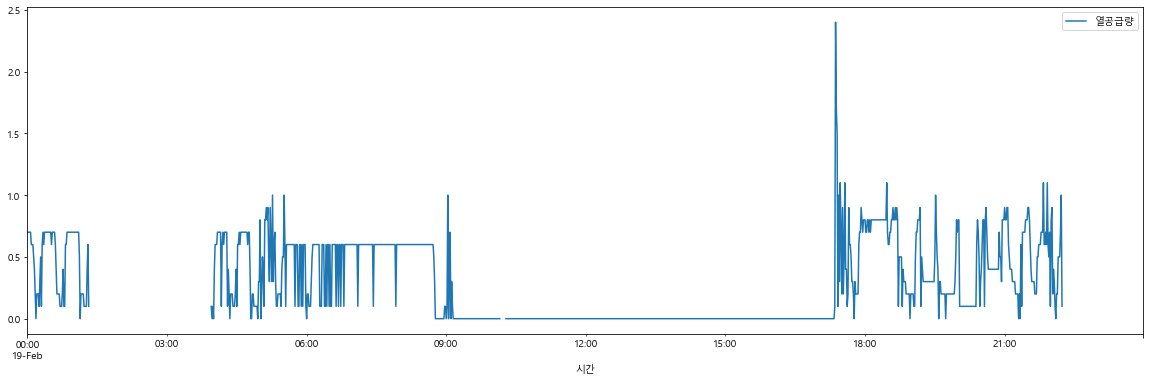

In [23]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
null_ymd_df[(null_ymd_df["년월일"] == "2022-02-19")].set_index("시간")["열공급량(kWh)"].plot(
    ax=ax,label="열공급량")
plt.legend()

# 결측 발생 패턴이 존재하나..?

null_ymd 결측확인

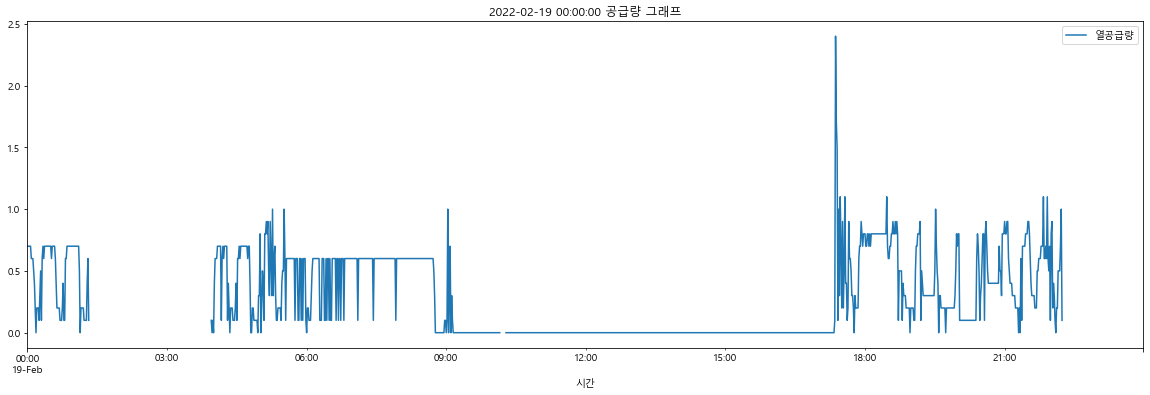

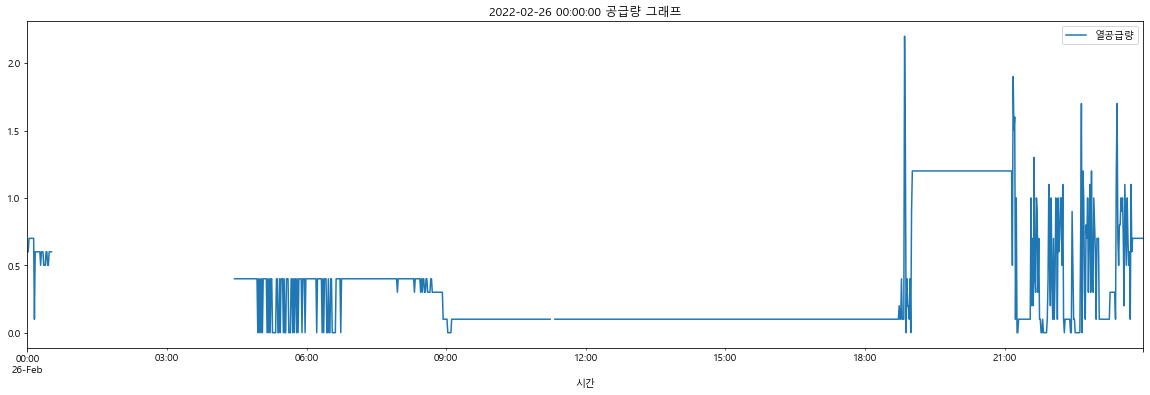

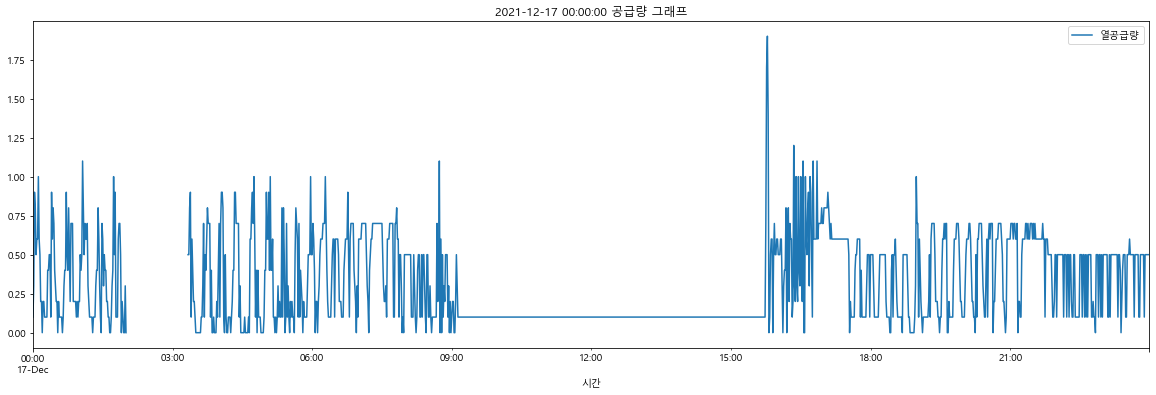

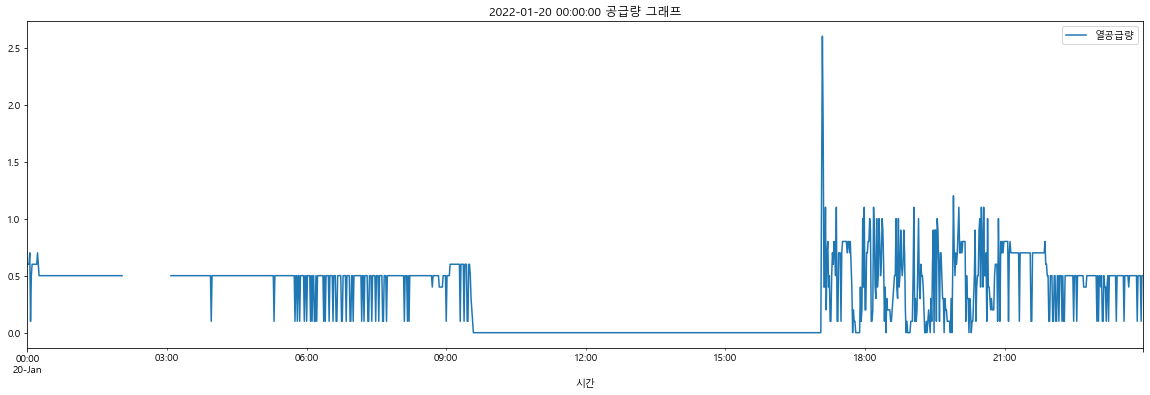

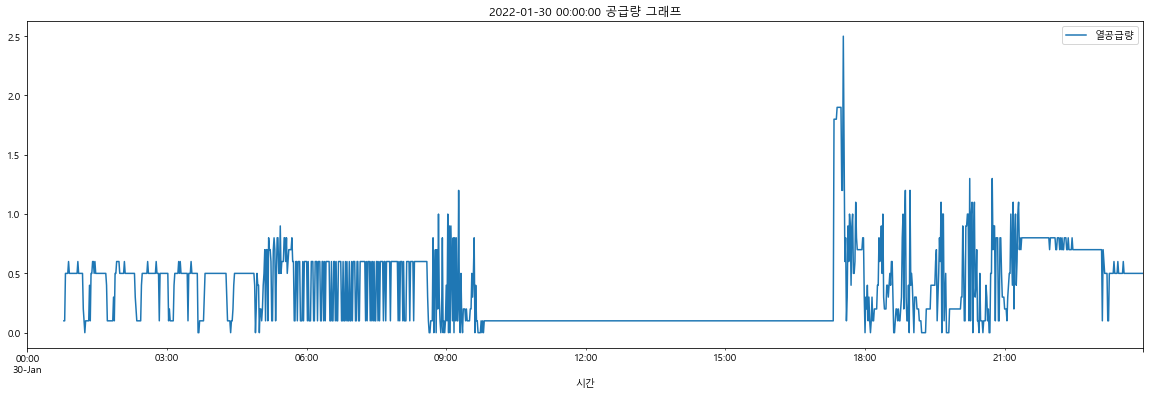

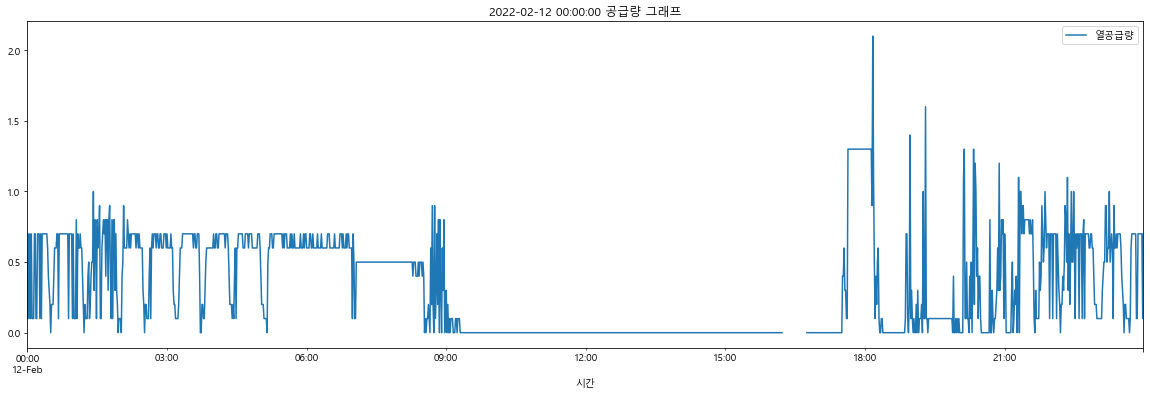

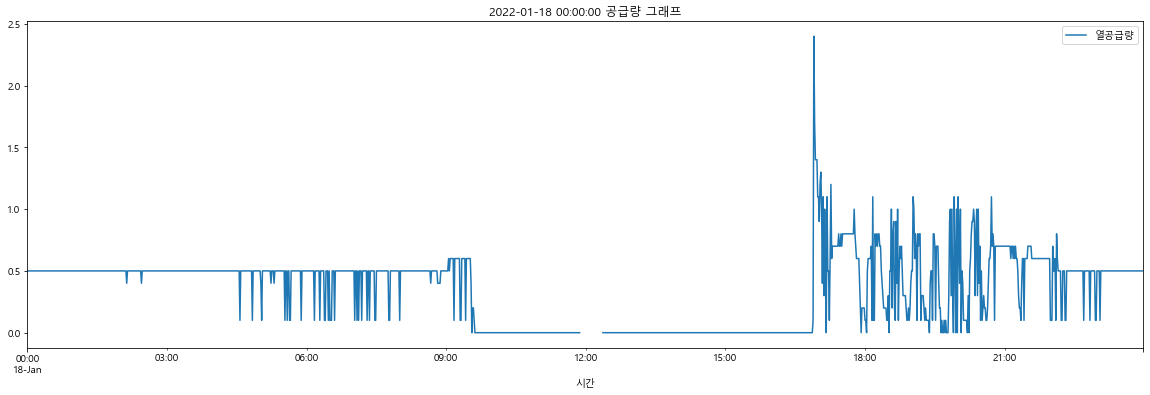

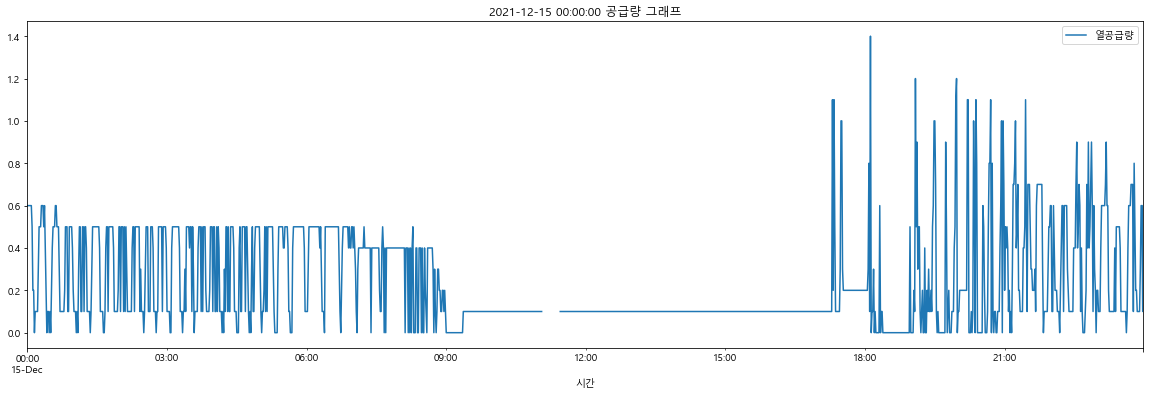

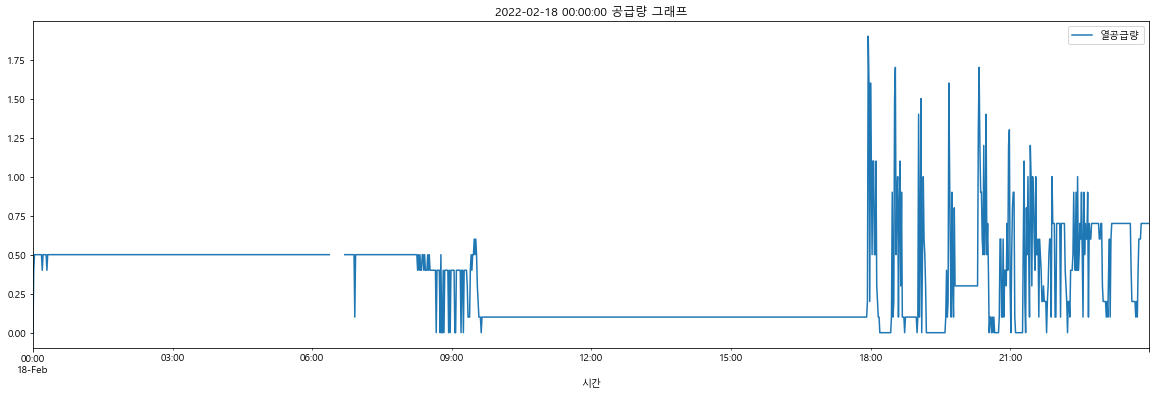

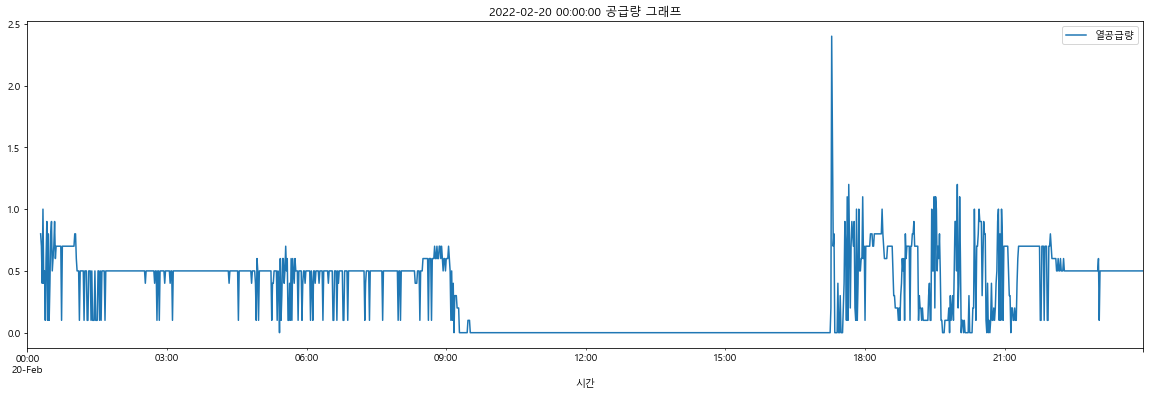

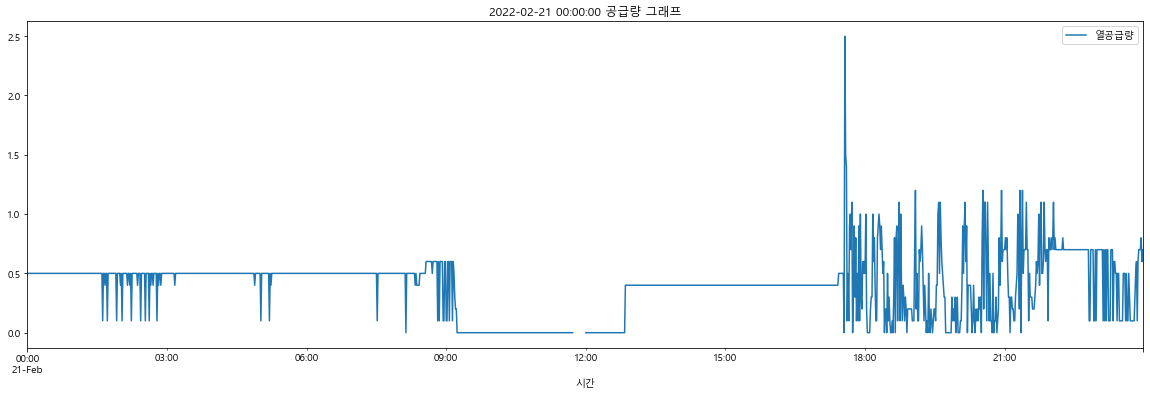

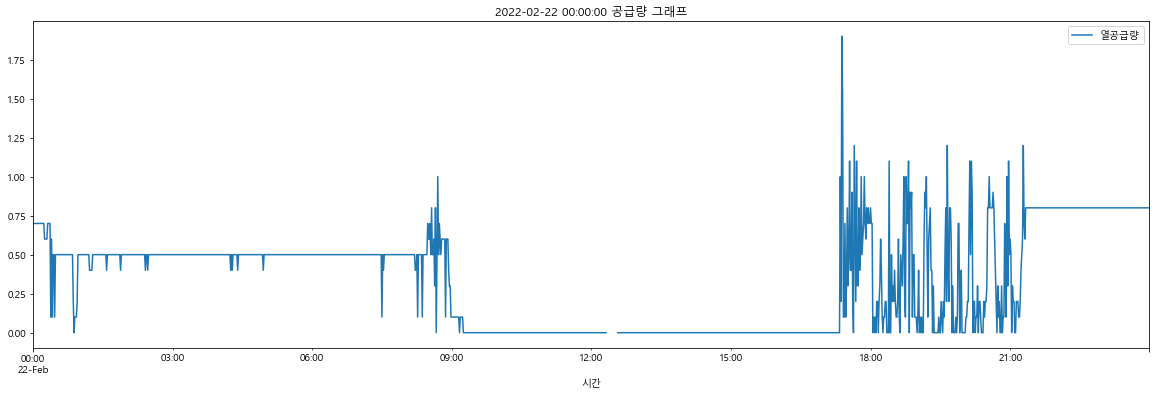

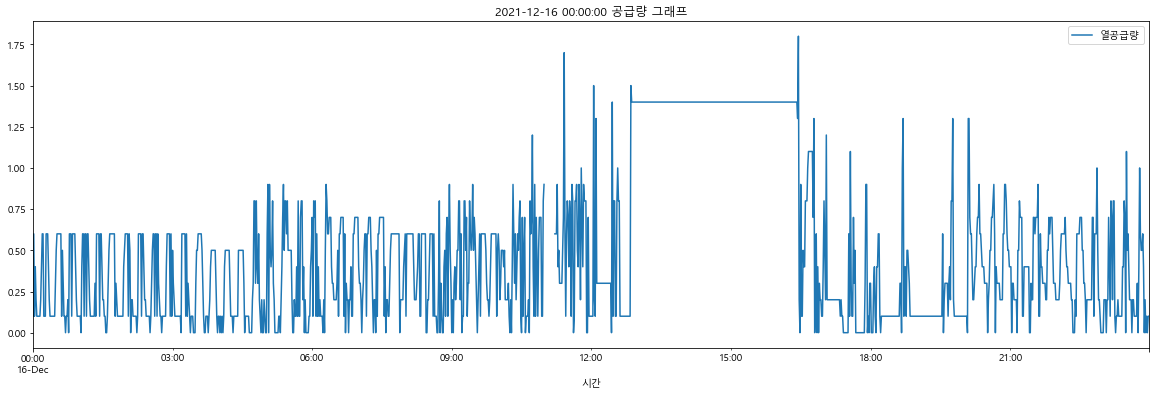

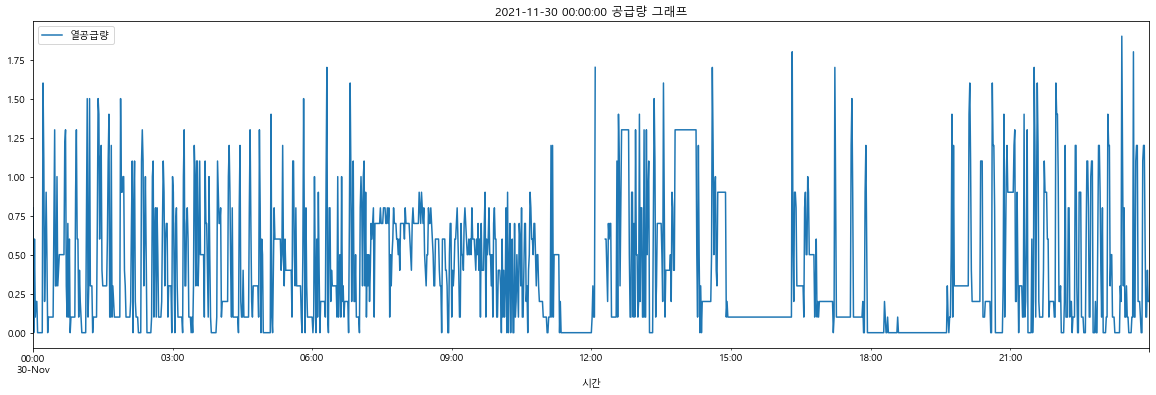

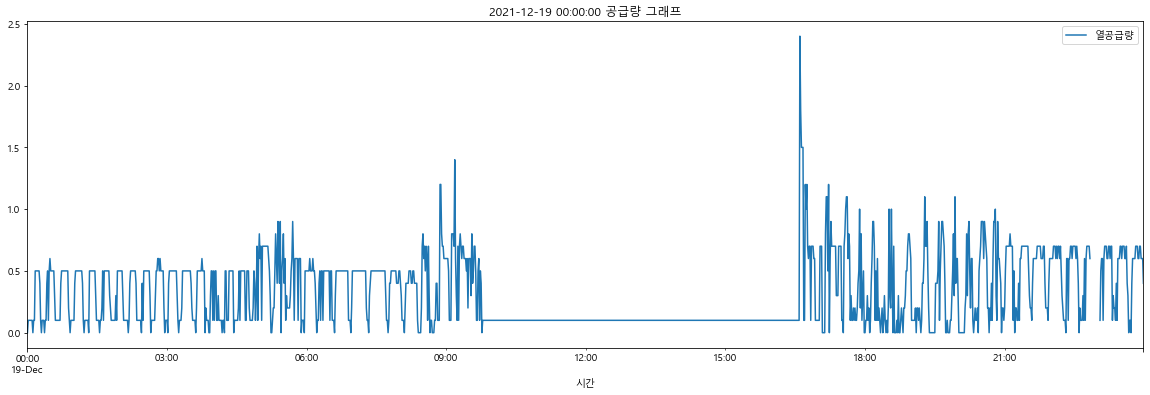

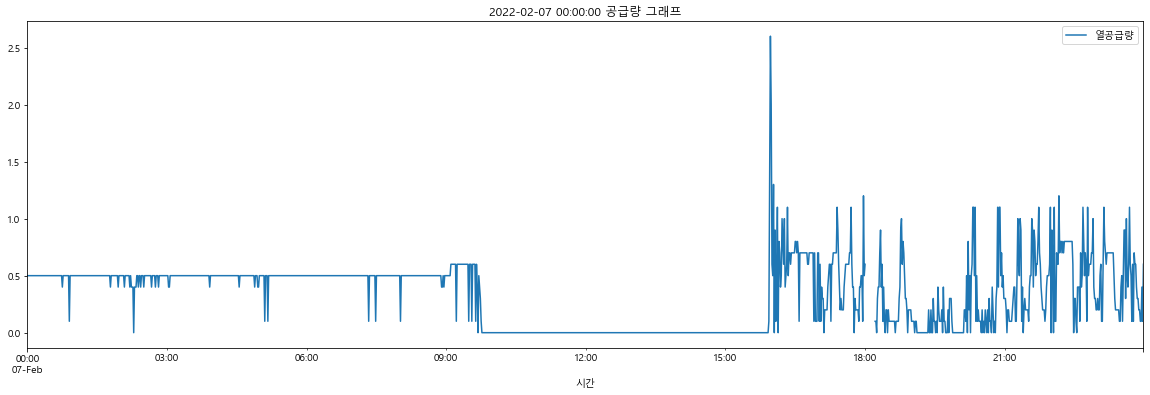

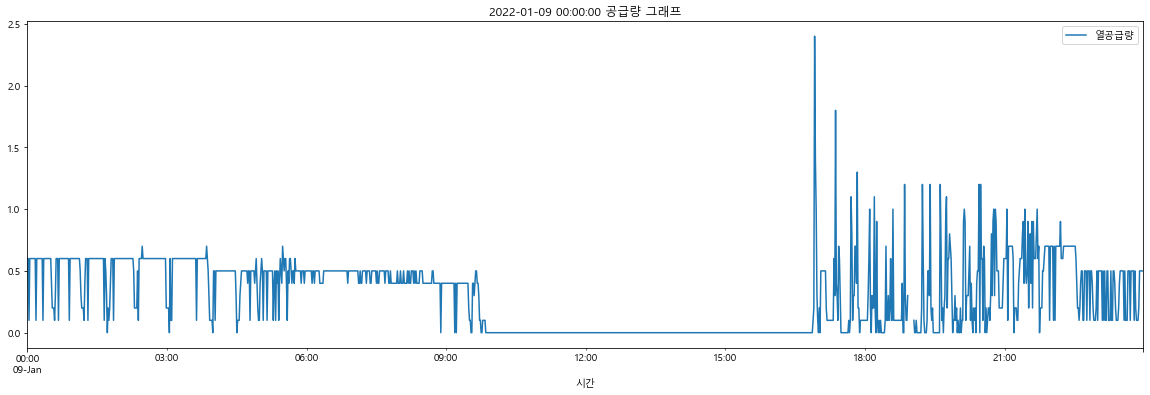

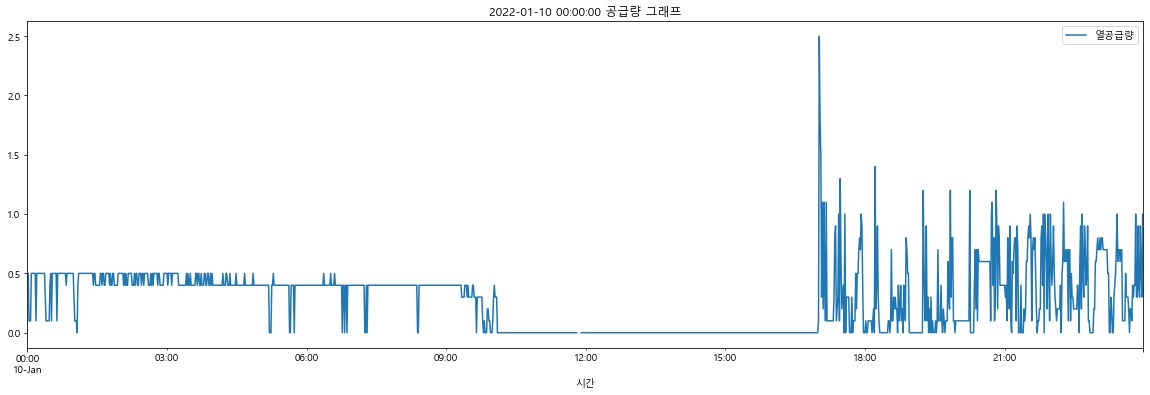

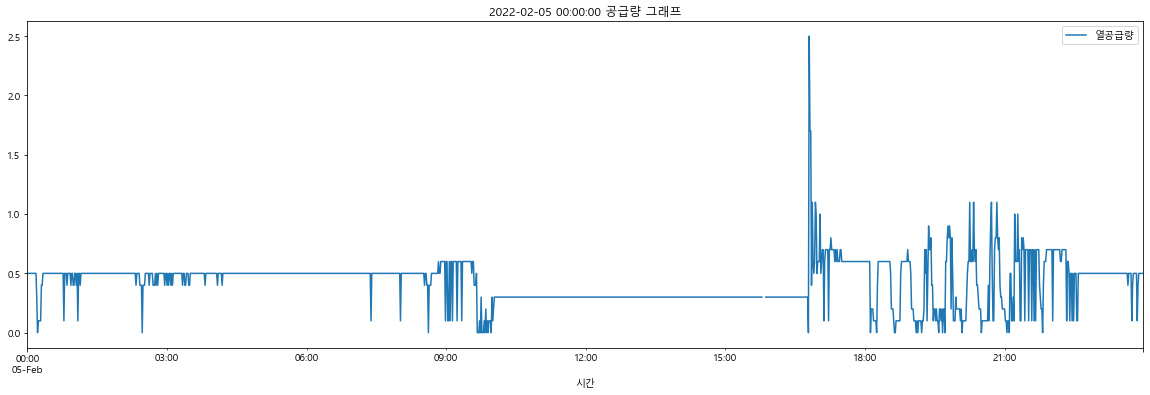

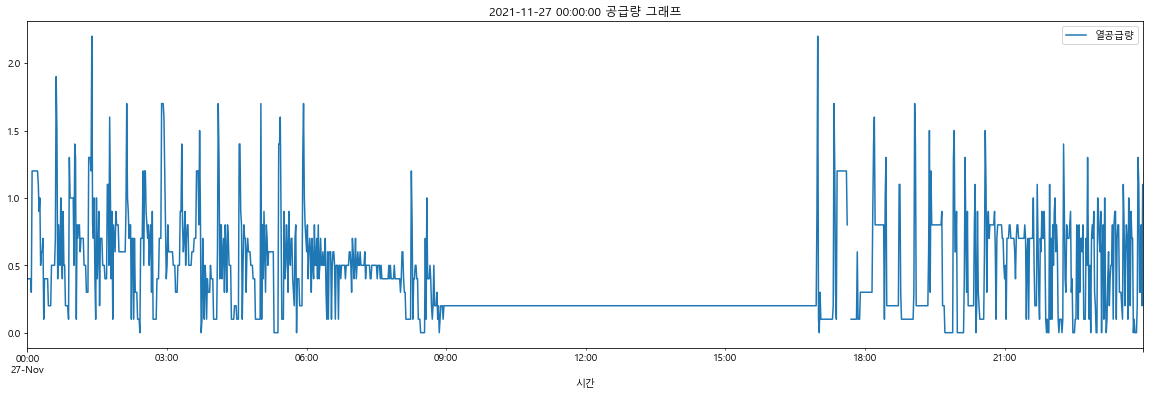

In [24]:
for date in null_ymd:
    fig,ax = plt.subplots(1,1,figsize=(20,6))
    train_df[train_df["년월일"] == date].set_index("시간")["열공급량(kWh)"].plot(ax=ax,label="열공급량")
    plt.title(str(date)+" 공급량 그래프")
    plt.legend()

KDE plot 확인

Text(0.5, 1.0, '열공급량 : 분포그래프 KDE plot')

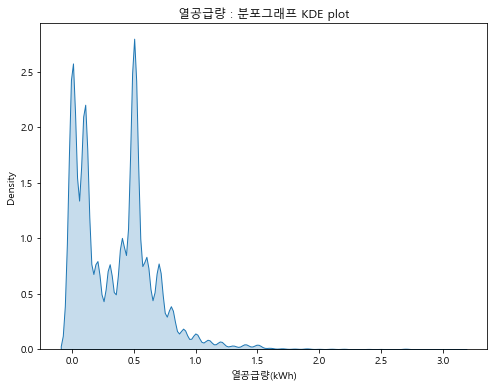

In [25]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.kdeplot(train_df["열공급량(kWh)"],shade=True, ax=ax)
plt.title("열공급량" + " : 분포그래프 KDE plot")

In [26]:
train_df[(train_df["열공급량(kWh)"] == 0) | (train_df["열공급량(kWh)"].isnull())].to_csv("test.csv",encoding="utf-8-sig")

### 2) x값 결측치 확인

내부 온도부터 팬코일 B동까지 전부 null인 데이터 : 512개

In [27]:
print("예측용 데이터 개수",len(test_df))

예측용 데이터 개수 20160


In [28]:
# 내부온도가 null인 512개 데이터 제거하고 다시한번 null 확인
train_df_2 = train_df[train_df["내부 온도"].notnull()].reset_index(drop=True)

train_df_2.isnull().sum()

시간                 0
년월일                0
년도                 0
월                  0
일                  0
시                  0
분                  0
일사량(W/㎡)           0
외기온(℃)             0
외기습도(%)            0
풍속(m/s)            0
풍향(º)              0
내부 온도              0
내부 습도              0
차광스크린(수평)          0
차열스크린(수평)          0
에너지스크린(수평)         0
에너지스크린(수직)         0
배기팬                0
천창                 0
유동팬                0
팬코일 B동             0
환기온도(천창 제어온도)    133
난방온도(설정온도)       132
열공급량(kWh)        915
dtype: int64

490개 정도의 데이터 내부온도,습도 ~ 난방온도, 환기온도까지 null값 다수 존재
- 내부온도가 null인 512개 데이터 제거하고 다시한번 null 확인
- 난방온도, 환기온도에 여전히 132~133개의 null 존재
- train_df_nonull : null 값 모두 제거한 데이터

In [29]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<AxesSubplot:>

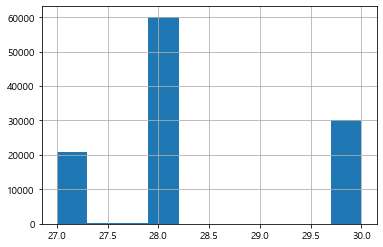

In [30]:
train_df_2.set_index("시간")["환기온도(천창 제어온도)"].hist()

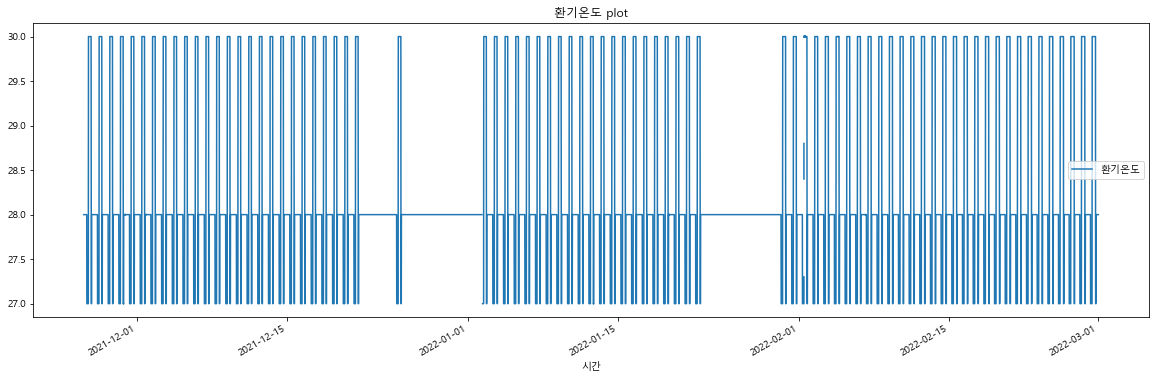

In [31]:
fig,ax = plt.subplots(1,1,figsize=(20,6))
train_df_2.set_index("시간")["환기온도(천창 제어온도)"].plot(ax=ax,label="환기온도")
plt.title("환기온도 plot")
plt.legend()

Violinplot으로 전체 기간에 대한 값 확인

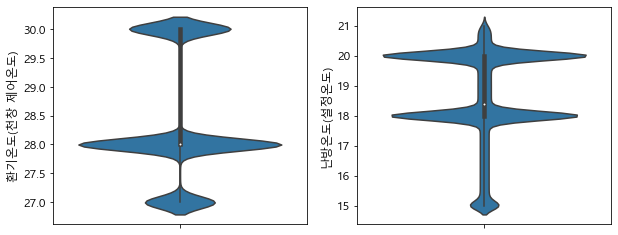

In [32]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.violinplot(y='환기온도(천창 제어온도)', data = train_df_2,ax=ax[0]) # 차이 없음
sns.violinplot(y='난방온도(설정온도)', data = train_df_2,ax=ax[1]) # 차이 없음
plt.show()

환기온도의 경우
- 계절에 따른 차이가 보이는 것 같지 않다
- 27~30도 선으로 유지
- 해당 월의 평균값으로 결측치 대체해볼까?
- 예측하는 방법?

In [33]:
test_df["환기온도(천창 제어온도)"].value_counts() / 20144 * 100

28.0    54.750794
30.0    25.948173
27.0    18.476966
27.6     0.064535
27.1     0.054607
27.2     0.054607
27.8     0.049643
27.5     0.049643
28.6     0.039714
29.7     0.034750
27.3     0.034750
28.1     0.034750
27.9     0.034750
27.7     0.034750
29.1     0.034750
29.6     0.029786
27.4     0.029786
28.9     0.029786
28.7     0.024821
28.2     0.024821
29.4     0.019857
29.2     0.019857
28.5     0.019857
29.9     0.019857
29.5     0.014893
28.4     0.014893
29.8     0.014893
29.3     0.014893
28.8     0.009929
29.0     0.009929
28.3     0.004964
Name: 환기온도(천창 제어온도), dtype: float64

In [34]:
test = train_df_2[(train_df_2["환기온도(천창 제어온도)"] != 28.0) 
           | (train_df_2["환기온도(천창 제어온도)"] != 30.0)
           | (train_df_2["환기온도(천창 제어온도)"] != 27.0)]

test2 = train_df_2[(train_df_2["환기온도(천창 제어온도)"] != 28.0) 
           & (train_df_2["환기온도(천창 제어온도)"] != 30.0)
           & (train_df_2["환기온도(천창 제어온도)"] != 27.0)]

<AxesSubplot:xlabel='시간'>

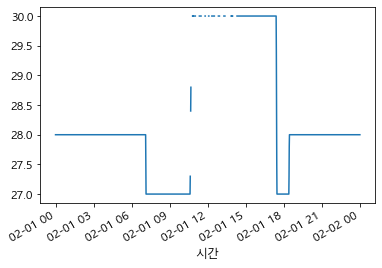

In [35]:
train_df_2[train_df_2["년월일"] == "2022-02-01"].set_index("시간")["환기온도(천창 제어온도)"].plot()

In [36]:
tt = train_df_2[train_df_2["년월일"] == "2022-02-01"]

tt[tt["시"] == 12]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
72379,2022-02-01 12:00:00,2022-02-01,2022,2,1,12,0,628.0,5.8,33,...,100.0,100.0,100.0,0.0,0.0,1.0,1.0,30.0,20.0,0.0
72380,2022-02-01 12:01:00,2022-02-01,2022,2,1,12,1,624.0,5.8,33,...,100.0,100.0,100.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0
72381,2022-02-01 12:04:00,2022-02-01,2022,2,1,12,4,628.0,5.7,33,...,100.0,100.0,100.0,0.0,0.0,0.0,1.0,30.0,20.0,0.0
72382,2022-02-01 12:05:00,2022-02-01,2022,2,1,12,5,624.0,5.7,33,...,100.0,100.0,100.0,0.0,0.0,1.0,1.0,30.0,20.0,0.0
72383,2022-02-01 12:06:00,2022-02-01,2022,2,1,12,6,636.0,5.7,33,...,100.0,100.0,100.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0
72384,2022-02-01 12:09:00,2022-02-01,2022,2,1,12,9,199.0,5.8,32,...,100.0,100.0,100.0,0.0,10.0,1.0,1.0,NaN,NaN,0.0
72385,2022-02-01 12:12:00,2022-02-01,2022,2,1,12,12,628.0,5.9,32,...,100.0,100.0,100.0,0.0,5.0,1.0,1.0,NaN,NaN,0.0
72386,2022-02-01 12:15:00,2022-02-01,2022,2,1,12,15,636.0,5.8,32,...,100.0,100.0,100.0,1.0,15.0,1.0,1.0,NaN,NaN,0.0
72387,2022-02-01 12:18:00,2022-02-01,2022,2,1,12,18,272.0,5.8,32,...,100.0,100.0,100.0,1.0,10.0,1.0,0.0,NaN,NaN,0.0
72388,2022-02-01 12:19:00,2022-02-01,2022,2,1,12,19,484.0,5.8,32,...,100.0,100.0,100.0,1.0,6.0,1.0,0.0,30.0,20.0,0.0


In [37]:
test2["년월일"].value_counts()

2022-02-01    66
2022-01-02    48
2021-11-29    35
2021-12-01    19
2022-02-04    16
              ..
2021-12-02    11
2022-01-14    11
2021-12-13    11
2022-01-08    11
2022-02-23     5
Name: 년월일, Length: 78, dtype: int64

In [38]:
train_df_2["환기온도(천창 제어온도)"].value_counts() / train_df_2["환기온도(천창 제어온도)"].value_counts().sum()

28.0    0.537720
30.0    0.269048
27.0    0.184958
27.1    0.000501
27.9    0.000492
27.8    0.000475
27.2    0.000475
27.6    0.000466
27.4    0.000457
27.5    0.000448
27.3    0.000421
27.7    0.000403
28.4    0.000260
28.7    0.000251
29.7    0.000242
29.5    0.000233
29.8    0.000233
29.2    0.000233
28.1    0.000224
28.2    0.000224
29.1    0.000224
29.4    0.000215
29.9    0.000215
28.5    0.000206
29.6    0.000206
28.8    0.000206
28.6    0.000197
29.0    0.000197
28.9    0.000197
29.3    0.000197
28.3    0.000179
Name: 환기온도(천창 제어온도), dtype: float64

### Violin plot으로 분포 확인하기
- 나열한 col의 데이터 모두 범주형 변수가 의심된다

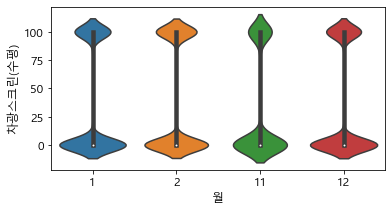

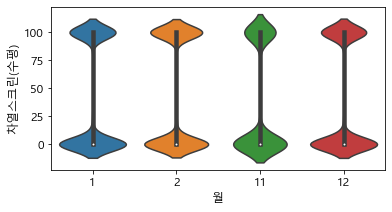

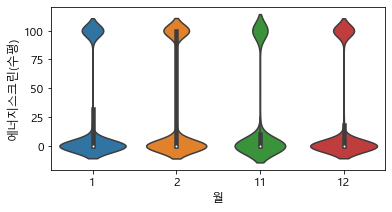

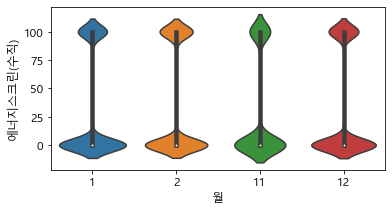

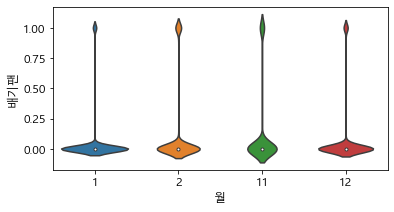

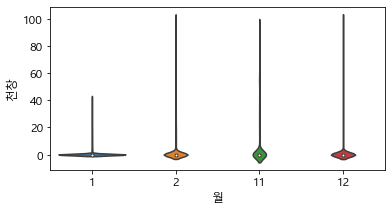

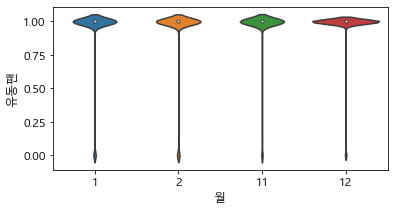

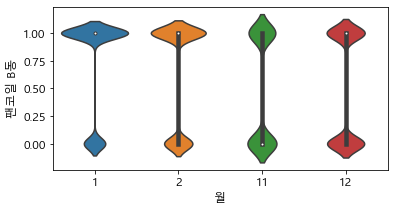

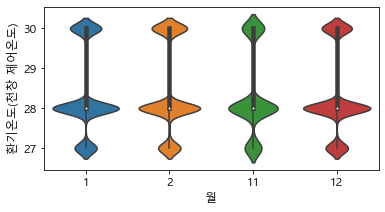

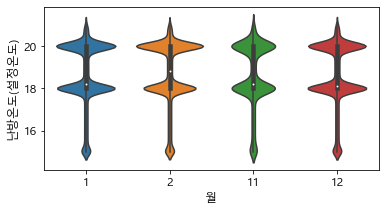

In [39]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(6,3))
    sns.violinplot(x="월",y= col, data = train_df_2)

난방온도의 경우
- 계절에 따른 차이가 보이는 것 같지 않다
- 16~20도 선으로 유지
- 해당 월의 평균값으로 결측치 대체해볼까?
- 예측하는 방법?

<AxesSubplot:xlabel='월', ylabel='난방온도(설정온도)'>

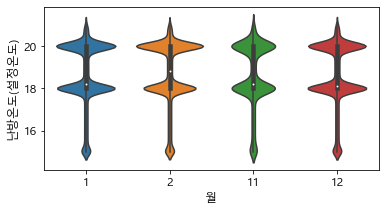

In [40]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(6,3))
sns.violinplot(x="월",y='난방온도(설정온도)', data = train_df_2)

결측치 전부 제거해보기
- train_df_3 : 결측치 하나도 없는 데이터
- 규칙성이 의심됨

In [41]:
train_df_3 = train_df_2[train_df_2["환기온도(천창 제어온도)"].notnull() &
                        train_df_2["열공급량(kWh)"].notnull()]

In [42]:
train_df_3.isnull().sum()

시간               0
년월일              0
년도               0
월                0
일                0
시                0
분                0
일사량(W/㎡)         0
외기온(℃)           0
외기습도(%)          0
풍속(m/s)          0
풍향(º)            0
내부 온도            0
내부 습도            0
차광스크린(수평)        0
차열스크린(수평)        0
에너지스크린(수평)       0
에너지스크린(수직)       0
배기팬              0
천창               0
유동팬              0
팬코일 B동           0
환기온도(천창 제어온도)    0
난방온도(설정온도)       0
열공급량(kWh)        0
dtype: int64

(26.0, 31.0)

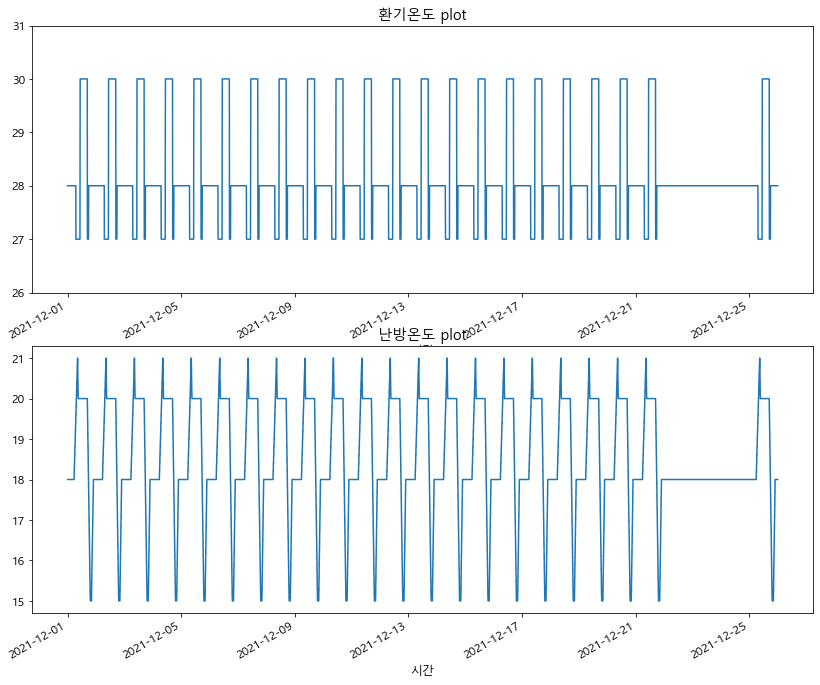

In [43]:
fig,ax = plt.subplots(2,1,figsize=(14,12))

train_df_3[train_df_3["월"] == 12].set_index("시간")[
    "환기온도(천창 제어온도)"].plot(ax=ax[0],label="환기온도")

train_df_3[train_df_3["월"] == 12].set_index("시간")[
    "난방온도(설정온도)"].plot(ax=ax[1],label="환기온도")

ax[0].set_title("환기온도 plot")
ax[1].set_title("난방온도 plot")
ax[0].set_ylim([26,31]) 

In [44]:
train_df_3.columns

Index(['시간', '년월일', '년도', '월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(kWh)'],
      dtype='object')

<AxesSubplot:xlabel='시', ylabel='에너지스크린(수직)'>

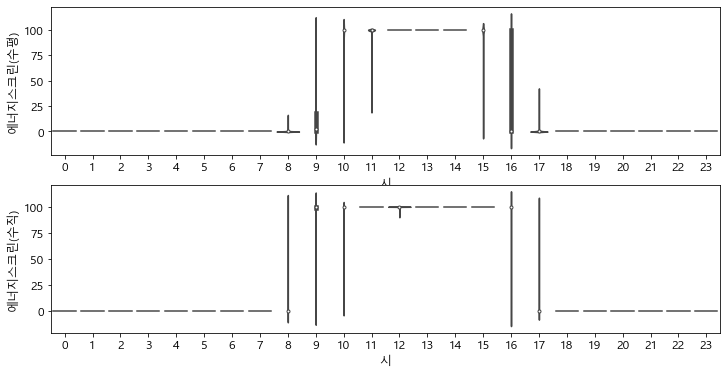

In [45]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(2,1,figsize=(12,6))
sns.violinplot(x="시",y='에너지스크린(수평)', data = train_df_3,ax=ax[0])
sns.violinplot(x="시",y='에너지스크린(수직)', data = train_df_3,ax=ax[1])

<AxesSubplot:xlabel='시', ylabel='환기온도(천창 제어온도)'>

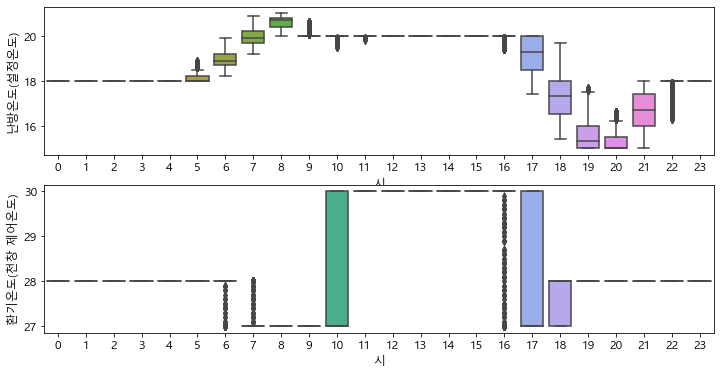

In [46]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(2,1,figsize=(12,6))
sns.boxplot(x="시",y='난방온도(설정온도)', data = train_df_3,ax=ax[0])
sns.boxplot(x="시",y='환기온도(천창 제어온도)', data = train_df_3,ax=ax[1])

난방온도, 환기온도 둘다 범주형으로 변환시킬 여지가 있어보임

### 히스토그램 및 특정 일자 내에서 그래프
- 히스토그램으로 분포 다시한번 확인 : 범주형으로 의심

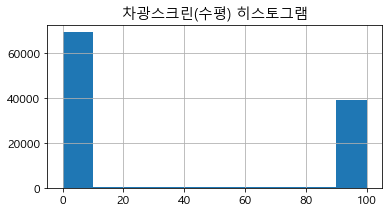

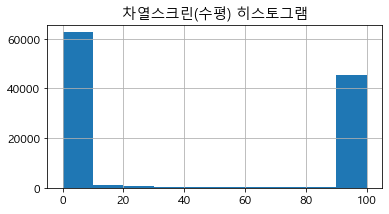

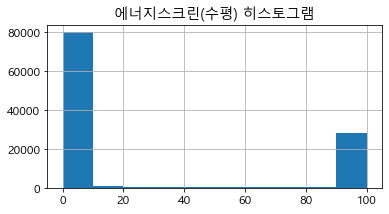

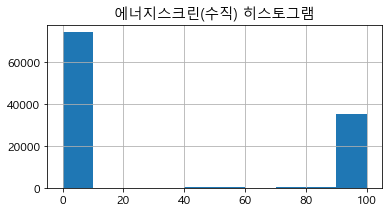

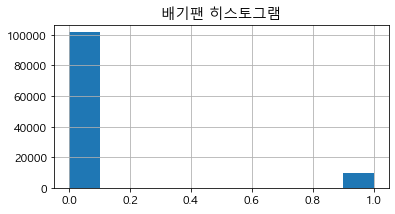

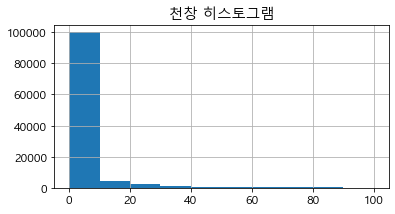

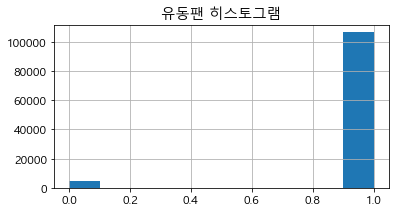

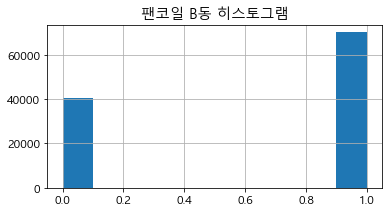

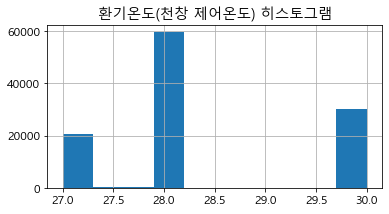

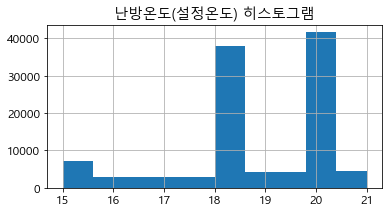

In [47]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(6,3))
    train_df_3[col].hist()
    plt.title(col + " 히스토그램")

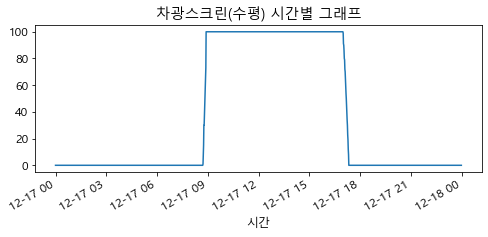

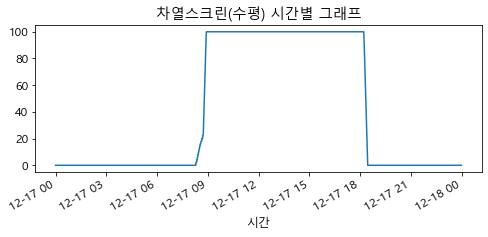

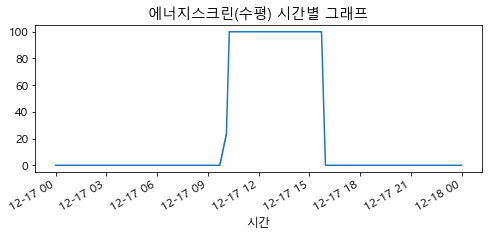

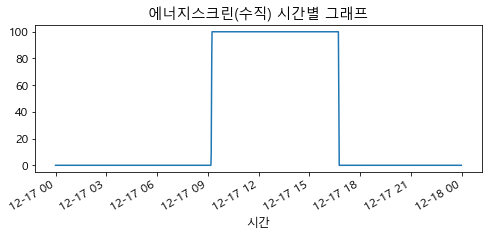

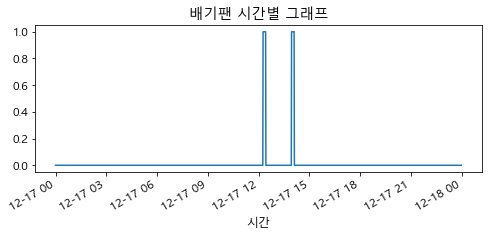

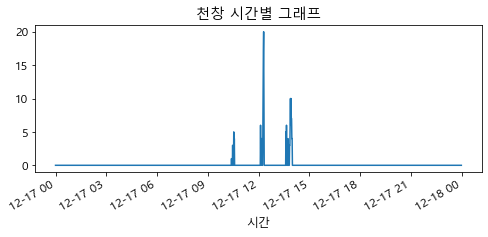

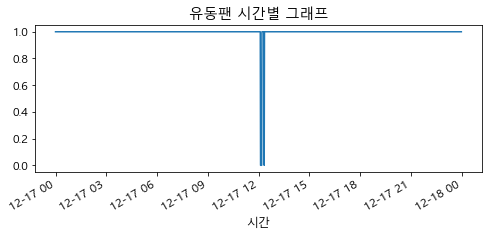

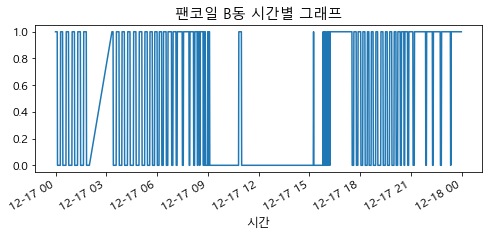

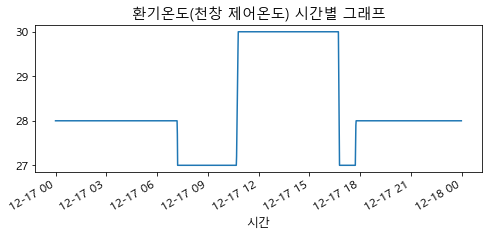

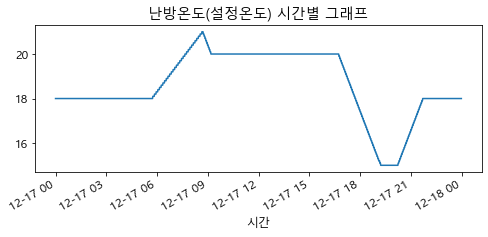

In [48]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(8,3))
    
    train_df_3[train_df_3["년월일"] == "2021-12-17"].set_index("시간")[col].plot()
    
    plt.title(col + " 시간별 그래프")

In [49]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)']:
    
    print(" ####### " + col + " ####### ")
    print(train_df_3[col].value_counts() / 110775 * 100)

 ####### 차광스크린(수평) ####### 
0.0      62.292936
100.0    35.126157
90.0      0.143534
70.0      0.110133
80.0      0.104717
           ...    
88.0      0.014444
87.0      0.013541
37.0      0.013541
41.0      0.013541
66.0      0.010833
Name: 차광스크린(수평), Length: 101, dtype: float64
 ####### 차열스크린(수평) ####### 
0.0      55.418641
100.0    40.640939
2.0       0.230196
6.0       0.214850
4.0       0.214850
           ...    
94.0      0.012638
53.0      0.011735
46.0      0.011735
82.0      0.010833
17.0      0.009027
Name: 차열스크린(수평), Length: 101, dtype: float64
 ####### 에너지스크린(수평) ####### 
0.0      71.053035
100.0    25.342361
2.0       0.193184
6.0       0.179643
4.0       0.178741
           ...    
56.0      0.013541
13.0      0.012638
85.0      0.011735
71.0      0.010833
42.0      0.008125
Name: 에너지스크린(수평), Length: 101, dtype: float64
 ####### 에너지스크린(수직) ####### 
0.0      66.970887
100.0    31.774317
93.0      0.057775
57.0      0.050553
90.0      0.050553
           ...    
2.0      

<AxesSubplot:xlabel='시', ylabel='천창'>

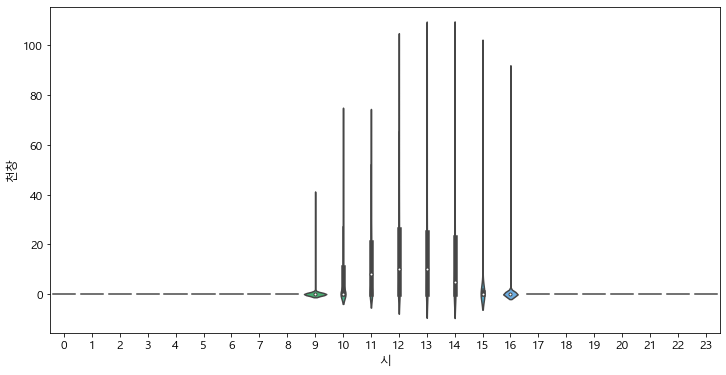

In [50]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x="시",y='천창', data = train_df_3,ax=ax)

오전 9시부터 16시까지 집중된 천창값
- 낮시간대에 편향된/ 값이긴 하지만 연속형으로 나타남

<AxesSubplot:>

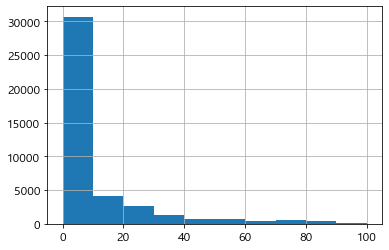

In [51]:
train_df_3[(8 < train_df_3["시"]) & (train_df_3["시"] < 18)]["천창"].hist()

에너지스크린 값 확인

<AxesSubplot:xlabel='시', ylabel='에너지스크린(수직)'>

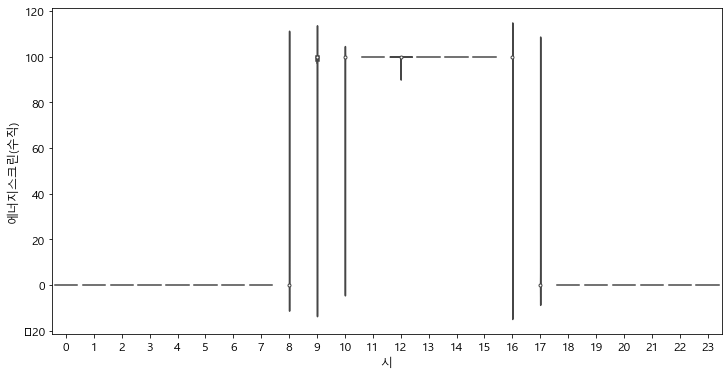

In [52]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.violinplot(x="시",y='에너지스크린(수직)', data = train_df_3,ax=ax)

csv로 확인해보기
- 일별로 0과 100이 아닌 데이터가 극소수임
- 특정일자 내에서 0과 100이 대부분이라면 범주형으로 처리해도 됨
- 비율 확인해보기 전체에서 98.7 %가 0과 100 범주형
- 평균적으로 년월일마다 0과 100이 아닌 것들이 비율이 어느정돈지 파악

In [53]:
train_df_3["년월일"] = train_df_3["년월일"].apply(lambda x : x.strftime("%Y-%m-%d"))

In [54]:
train_df_3.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,0.9
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,0.9


In [55]:
date_ratio_lst = []

for date in train_df_3["년월일"].value_counts().index:
    date_df = train_df_3[train_df_3["년월일"] == date][["시간","에너지스크린(수직)"]]
    # 21년 12월 17일의 데이터

    cnt = date_df[(date_df["에너지스크린(수직)"] != 0.0) & (date_df["에너지스크린(수직)"] != 100.0)]

    date_ratio_lst.append(round(len(cnt) / len(date_df) * 100,4))

In [56]:
date_ratio_lst # 아무리 높아도 5프로
print(date_ratio_lst.index(max(date_ratio_lst))) # 35번 인덱스가 5% 정도로 최대
print(train_df_3["년월일"].value_counts().index[35]) # 2022년 2월 2일

28
2022-02-16


In [57]:
train_220202 = train_df_3[train_df_3["년월일"] == "2022-02-02"][["시간","에너지스크린(수직)","열공급량(kWh)"]]
# 22년 2월 2일의 데이터

In [58]:
train_220202.to_csv("에너지스크린(수직).csv",encoding="utf-8-sig",index=False)

22년 2월 2일 데이터에서 스크린이 열리는 때 다른 스크린들이 어떻게 작동하는지 확인해보고 싶음

In [59]:
train_220202_all = train_df_3[train_df_3["년월일"] == "2022-02-02"]

In [60]:
train_220202_all = train_220202_all[(train_220202_all["에너지스크린(수직)"] != 0.0) 
                                    & (train_220202_all["에너지스크린(수직)"] != 100.0)]

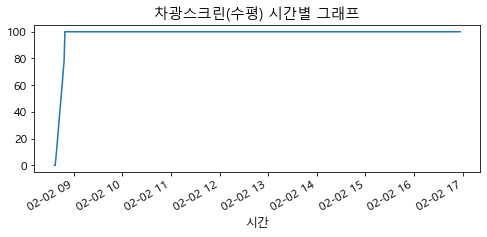

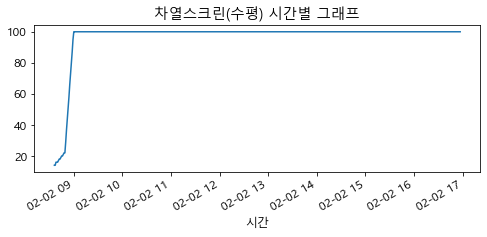

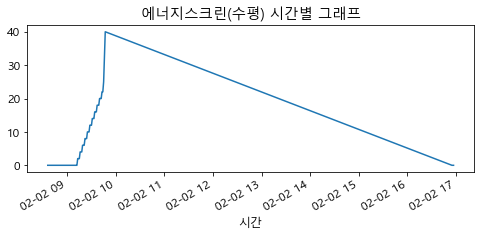

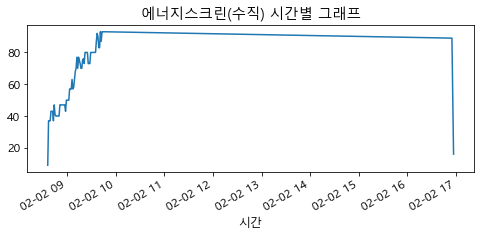

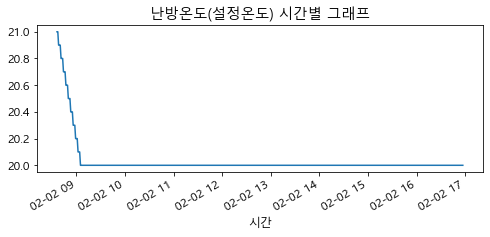

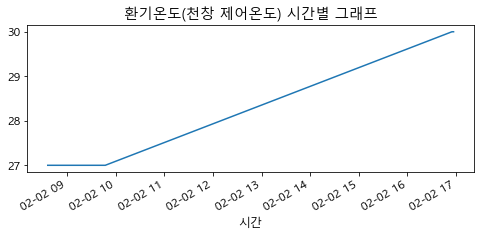

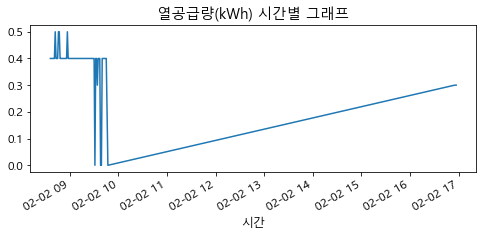

In [61]:
for col in ['차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)',"난방온도(설정온도)","환기온도(천창 제어온도)","열공급량(kWh)"]:
    
    plt.rcParams['font.size'] = 12

    fig,ax = plt.subplots(figsize=(8,3))
    
    train_220202_all.set_index("시간")[col].plot()
    
    plt.title(col + " 시간별 그래프")

난방온도(설정온도)

Text(0.5, 1.0, '난방온도 : 분포그래프 KDE plot')

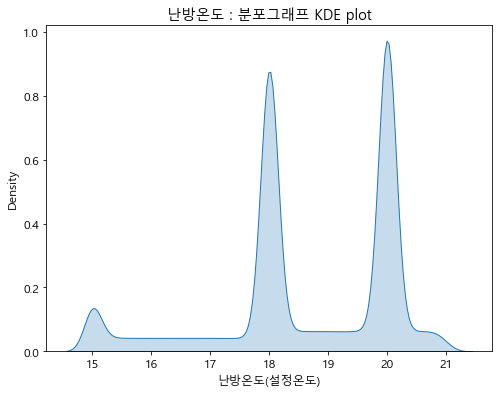

In [62]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.kdeplot(train_df_3["난방온도(설정온도)"],shade=True, ax=ax)
plt.title("난방온도" + " : 분포그래프 KDE plot")

In [63]:
train_df_3["난방온도(설정온도)"].value_counts() / train_df_3["난방온도(설정온도)"].value_counts().sum() * 100

20.0    34.312796
18.0    31.099075
15.0     4.394493
19.9     0.649966
19.8     0.644550
          ...    
17.9     0.416159
17.3     0.415256
17.5     0.415256
17.6     0.411645
21.0     0.316858
Name: 난방온도(설정온도), Length: 61, dtype: float64

### 결측치 보간하기 및 범주형 변수로의 전환
- 1) 결측치 보간하기
- 2) 범주형 변수로 전환하기

- train_df_2 : 결측치 133개 정도 존재
- train_df_3 : 결측치가 존재하지 않음
*Y값 결측치는 drop해주기

In [183]:
smart_farm_null = train_df_2.copy()

# Y값 결측치는 drop해주기
smart_farm_null = smart_farm_null[smart_farm_null["열공급량(kWh)"].notnull()].reset_index(drop=True)

In [184]:
len(smart_farm_null)

110908

In [185]:
smart_farm_null.isnull().sum()

시간                 0
년월일                0
년도                 0
월                  0
일                  0
시                  0
분                  0
일사량(W/㎡)           0
외기온(℃)             0
외기습도(%)            0
풍속(m/s)            0
풍향(º)              0
내부 온도              0
내부 습도              0
차광스크린(수평)          0
차열스크린(수평)          0
에너지스크린(수평)         0
에너지스크린(수직)         0
배기팬                0
천창                 0
유동팬                0
팬코일 B동             0
환기온도(천창 제어온도)    133
난방온도(설정온도)       132
열공급량(kWh)          0
dtype: int64

In [186]:
smart_farm_null[smart_farm_null["환기온도(천창 제어온도)"].isnull()].head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.5
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5515,2021-11-29 21:33:00,2021-11-29,2021,11,29,21,33,-3.5,5.8,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0


#### 앞뒤 데이터 평균으로 결측치 보간하기
- 30개 정도만 줄어들게 됨

In [187]:
def get_온도_결측치(data):
    
    측정목록 = ["환기온도(천창 제어온도)","난방온도(설정온도)"]
    결과리스트 = []

    # 데이터프레임 copy하기
    df = data.copy()
    
    for 항목 in 측정목록:
        for idx,row in df[df[항목].isnull()].iterrows():
            if df.loc[idx+1,항목] != np.nan:
                if df.loc[idx-1,항목] != np.nan:
                    df.loc[idx,항목] = ( df.loc[idx+1,항목]+df.loc[idx-1,항목] ) / 2
    결과리스트.append(df)
    
    return pd.concat(결과리스트,axis=0,ignore_index = True)

In [188]:
smart_farm_nonull = get_온도_결측치(smart_farm_null)

In [189]:
print("결측치 처리 이전",smart_farm_null.isnull().sum().sum())
print("결측치 처리 이후",smart_farm_nonull.isnull().sum().sum())

결측치 처리 이전 265
결측치 처리 이후 227


- 5283번, 5493번 전날 다음날 평균으로 해결 가능

In [190]:
# 결측치 처리 후
smart_farm_null.iloc[[5282,5283,5284,5492,5493,5495],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5282,2021-11-29 17:32:00,2021-11-29,2021,11,29,17,32,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.4,0.0
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0
5284,2021-11-29 17:36:00,2021-11-29,2021,11,29,17,36,-2.7,13.4,45,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.2,0.0
5492,2021-11-29 21:04:00,2021-11-29,2021,11,29,21,4,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.7,0.5
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,1.5
5495,2021-11-29 21:07:00,2021-11-29,2021,11,29,21,7,-3.0,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.8,0.2


In [191]:
# 결측치 처리 후
smart_farm_nonull.iloc[[5282,5283,5284,5492,5493,5495],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5282,2021-11-29 17:32:00,2021-11-29,2021,11,29,17,32,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.40,0.0
5283,2021-11-29 17:34:00,2021-11-29,2021,11,29,17,34,-2.7,13.4,44,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.30,0.0
5284,2021-11-29 17:36:00,2021-11-29,2021,11,29,17,36,-2.7,13.4,45,...,100.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,18.20,0.0
5492,2021-11-29 21:04:00,2021-11-29,2021,11,29,21,4,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.70,0.5
5493,2021-11-29 21:05:00,2021-11-29,2021,11,29,21,5,-2.8,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.75,1.5
5495,2021-11-29 21:07:00,2021-11-29,2021,11,29,21,7,-3.0,6.3,72,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,16.80,0.2


#### 회귀대체 방법
- 2개 열 모두 결측인 케이스 : 113개
- 1개 열만 결측인 케이스 : 114개

In [192]:
smart_farm_nonull[(smart_farm_nonull["환기온도(천창 제어온도)"].isnull()) & (smart_farm_nonull["난방온도(설정온도)"].isnull())].shape

(113, 25)

#### 1개 열만 결측인 경우
- smart_farm_all_nonull : 평균 보간 이후 결측치가 아예 없는 것

In [193]:
from sklearn import linear_model

In [194]:
smart_farm_all_nonull = smart_farm_nonull.dropna(axis=0,how="any")

vent_temp = smart_farm_nonull[smart_farm_nonull["난방온도(설정온도)"].notnull()]
# vent_temp(환기 온도) : 환기온도(천창 제어온도)만 null인 데이터

heat_temp = smart_farm_nonull[smart_farm_nonull["환기온도(천창 제어온도)"].notnull()]
# heat_temp(난방 온도) : 난방온도(설정온도)만 null인 데이터

vent_temp : 환기온도 채우기

In [195]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '난방온도(설정온도)', '열공급량(kWh)']

X = smart_farm_all_nonull[col_lst]

y = smart_farm_all_nonull["환기온도(천창 제어온도)"]

In [196]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(vent_temp[col_lst])

vent_temp_pred = pd.DataFrame(vent_temp[['시간','환기온도(천창 제어온도)']].fillna(pd.Series(y_pred.flatten())))
vent_temp['환기온도(천창 제어온도)'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [197]:
# 예측한 값들 채우기
smart_farm_nonull.loc[vent_temp.index,"환기온도(천창 제어온도)"] = smart_farm_nonull.loc[vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(vent_temp["환기온도(천창 제어온도)"])

heat_temp : 난방온도 채우기

In [198]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
                   '환기온도(천창 제어온도)', '열공급량(kWh)']

X = smart_farm_all_nonull[col_lst]

y = smart_farm_all_nonull["난방온도(설정온도)"]

In [199]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(heat_temp[col_lst])

heat_temp_pred = pd.DataFrame(heat_temp[['시간','난방온도(설정온도)']].fillna(pd.Series(y_pred.flatten())))
heat_temp['난방온도(설정온도)'].fillna(pd.Series(y_pred.flatten()), inplace=True)

In [200]:
# 예측한 값들 채우기
smart_farm_nonull.loc[heat_temp.index,"난방온도(설정온도)"] = smart_farm_nonull.loc[heat_temp.index,
                                                   "난방온도(설정온도)"].fillna(heat_temp["난방온도(설정온도)"])

In [201]:
smart_farm_nonull.shape

(110908, 25)

#### 2개 열만 결측인 경우
- smart_farm_all_nonull : 평균 보간 이후 결측치가 아예 없는 것
- smart_farm_nonull : 결측치가 1개열만 있는 것은 채워지고 2개 열에 대한 결측만 존재하는 상태

index 이상없게 reset 한번 해주기

In [209]:
smart_farm_nonull.reset_index(drop=True,inplace=True)

In [244]:
col_lst = ['일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동', '열공급량(kWh)']

heat_vent_temp = smart_farm_nonull[(smart_farm_nonull["난방온도(설정온도)"].isnull()) &
                                   (smart_farm_nonull["환기온도(천창 제어온도)"].isnull())]

X = smart_farm_all_nonull[col_lst]

y_1 = smart_farm_all_nonull["난방온도(설정온도)"] ; y_2 = smart_farm_all_nonull["환기온도(천창 제어온도)"]

# 각각 예측하기
reg_1 = linear_model.LinearRegression() ; reg_1.fit(X,y_1)
reg_2 = linear_model.LinearRegression() ; reg_2.fit(X,y_2)

y_pred_1 = reg_1.predict(heat_vent_temp[col_lst])
y_pred_2 = reg_2.predict(heat_vent_temp[col_lst])

heat_vent_temp['난방온도(설정온도)'] =  y_pred_1.flatten()
heat_vent_temp['환기온도(천창 제어온도)'] = y_pred_2.flatten()

In [247]:
heat_vent_temp.head()

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.980517,17.757231,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.007928,17.240709,0.0
5515,2021-11-29 21:33:00,2021-11-29,2021,11,29,21,33,-3.5,5.8,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.936868,17.109450,0.0
5516,2021-11-29 21:36:00,2021-11-29,2021,11,29,21,36,-3.7,5.7,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.975357,17.653251,0.2
5517,2021-11-29 21:39:00,2021-11-29,2021,11,29,21,39,-3.6,5.5,74,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.008280,17.818542,0.6


In [248]:
smart_farm_nonull.loc[heat_vent_temp.index,"난방온도(설정온도)"] = smart_farm_nonull.loc[heat_vent_temp.index,
                                                   "난방온도(설정온도)"].fillna(heat_vent_temp["난방온도(설정온도)"])


smart_farm_nonull.loc[heat_vent_temp.index,"환기온도(천창 제어온도)"] = smart_farm_nonull.loc[heat_vent_temp.index,
                                                   "환기온도(천창 제어온도)"].fillna(heat_vent_temp["환기온도(천창 제어온도)"])

In [250]:
smart_farm_nonull.loc[[5513,5514],:]

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(kWh)
5513,2021-11-29 21:27:00,2021-11-29,2021,11,29,21,27,-3.5,6.1,73,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,27.980517,17.757231,0.0
5514,2021-11-29 21:30:00,2021-11-29,2021,11,29,21,30,-3.6,6.0,73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.007928,17.240709,0.0


### 결측치 처리 완료
- smart_farm_nonull : 결측치 존재하지 않음

In [254]:
smart_farm_nonull.to_csv("smart_farm_train_nonull.csv",encoding="utf-8-sig",index=False)

음수 깨지기 방지

In [ ]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

KDE plot

In [ ]:
for col in train_df.columns[6:-1]:
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    sns.kdeplot(train_df[col],shade=True, ax=ax)
    plt.title(col + " : 분포그래프 KDE plot")

시계열 그래프

In [39]:
range3 = pd.date_range(start="2021-11-26",end="2021-12-25")
range4 = pd.date_range(start="2022-01-02",end="2022-01-22")
range5 = pd.date_range(start="2022-01-30",end="2022-02-08")

range3_df = train_df[(train_df["시간"].isin(range3))]
range4_df = train_df[(train_df["시간"].isin(range4))]
range5_df = train_df[(train_df["시간"].isin(range5))]

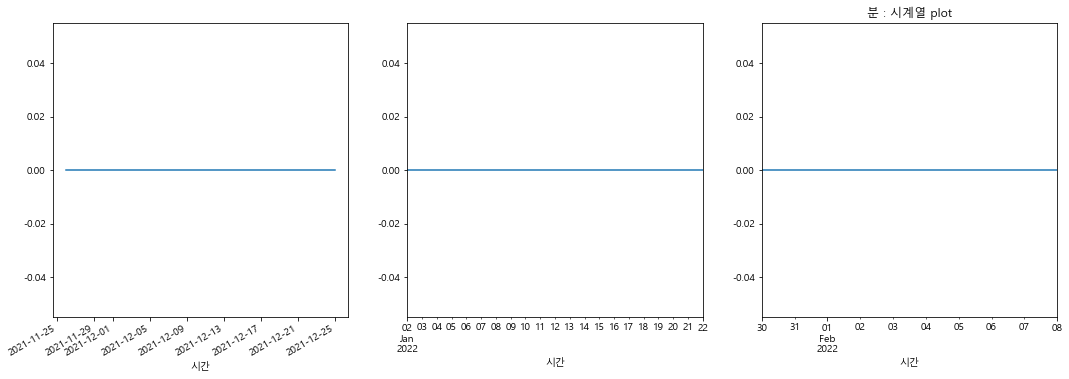

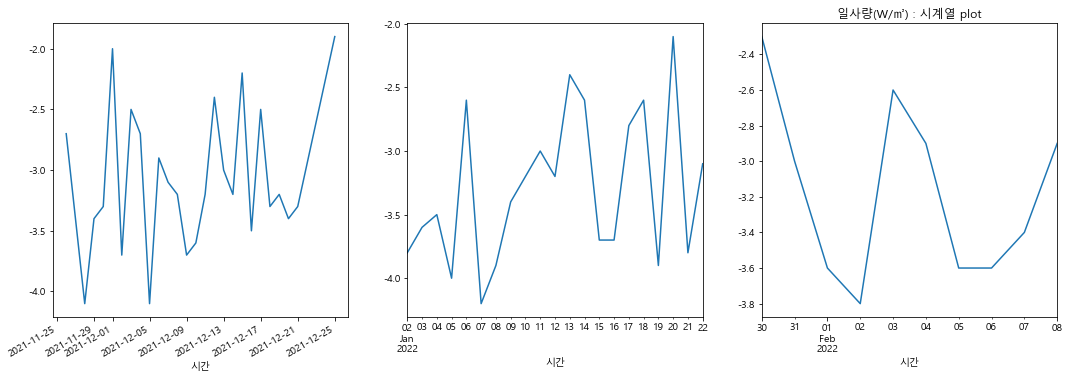

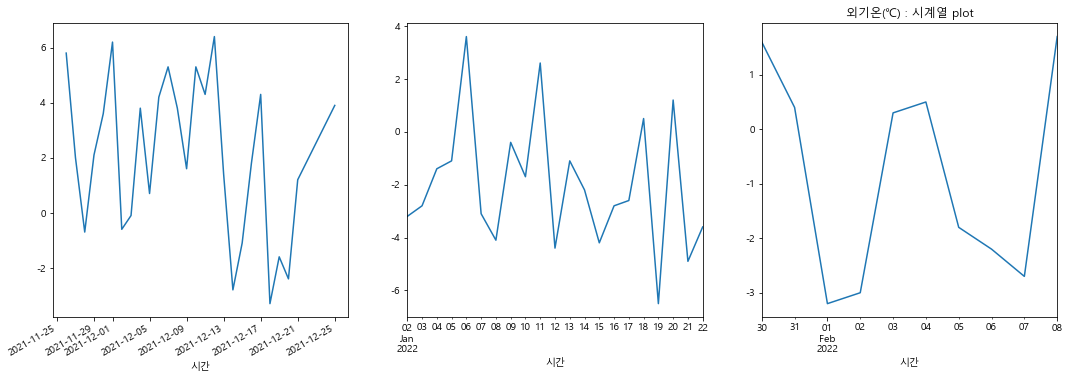

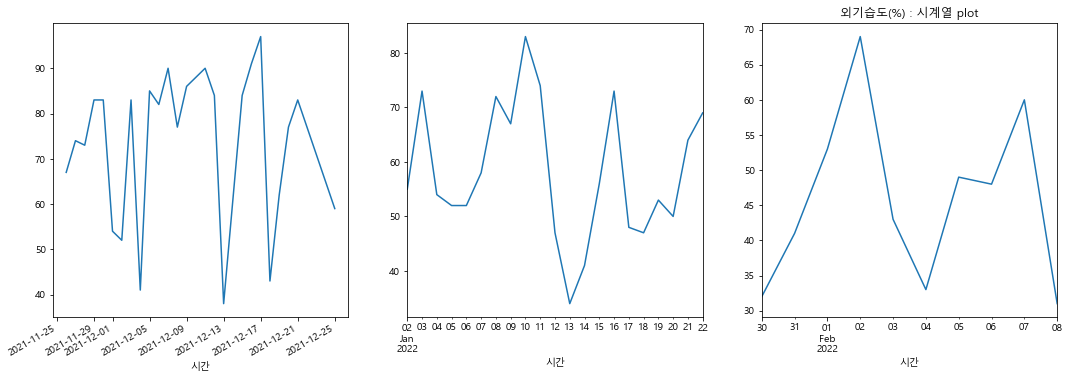

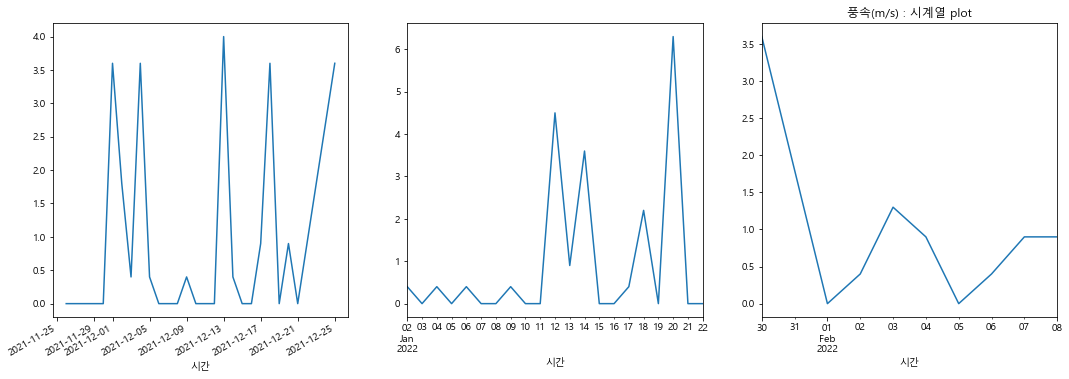

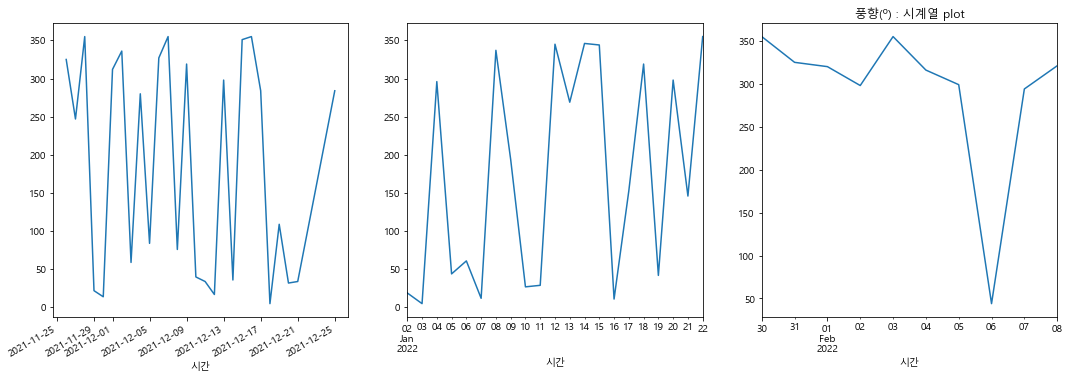

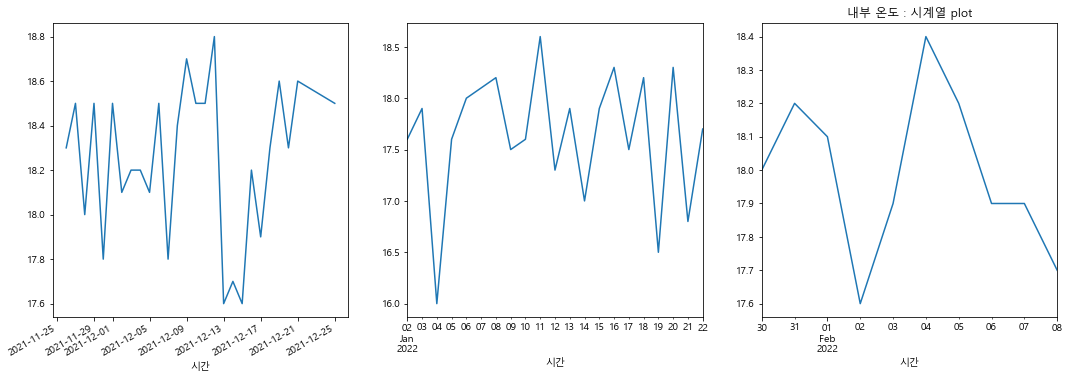

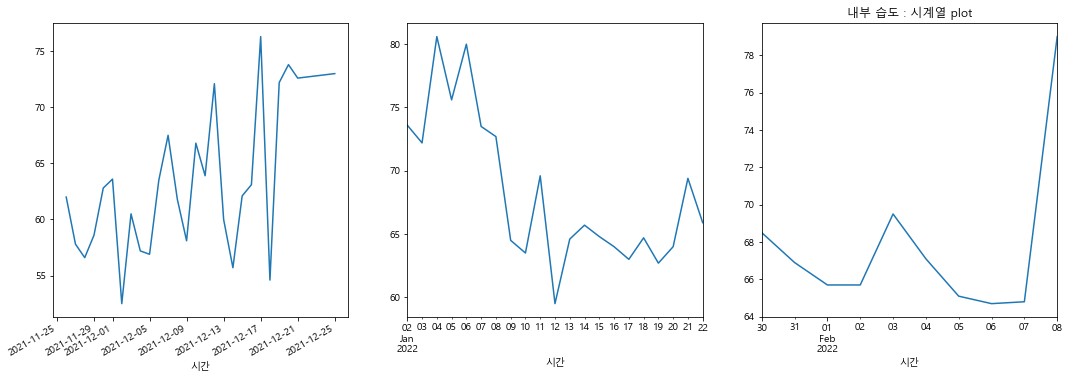

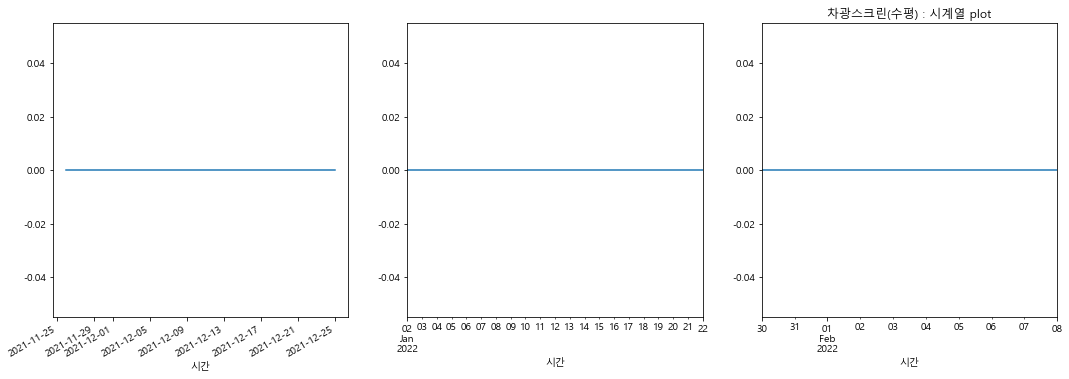

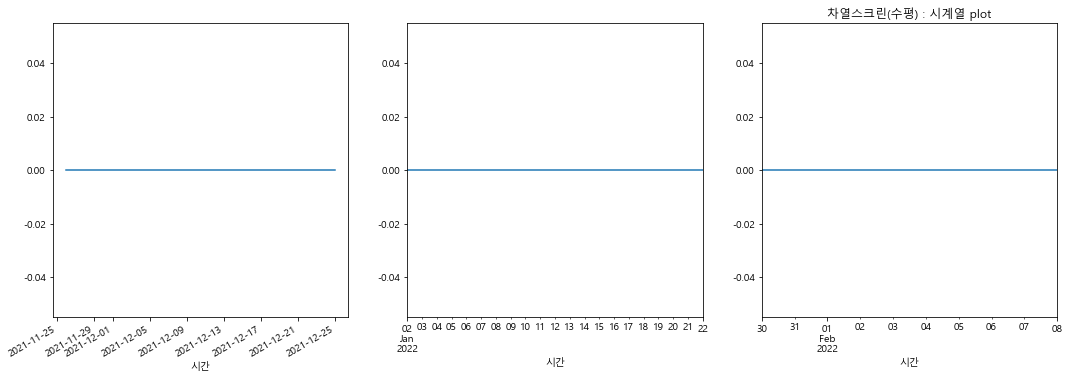

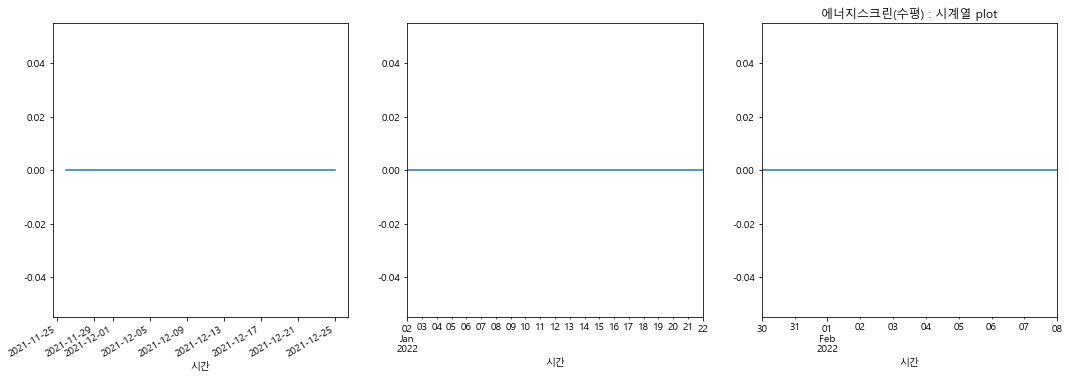

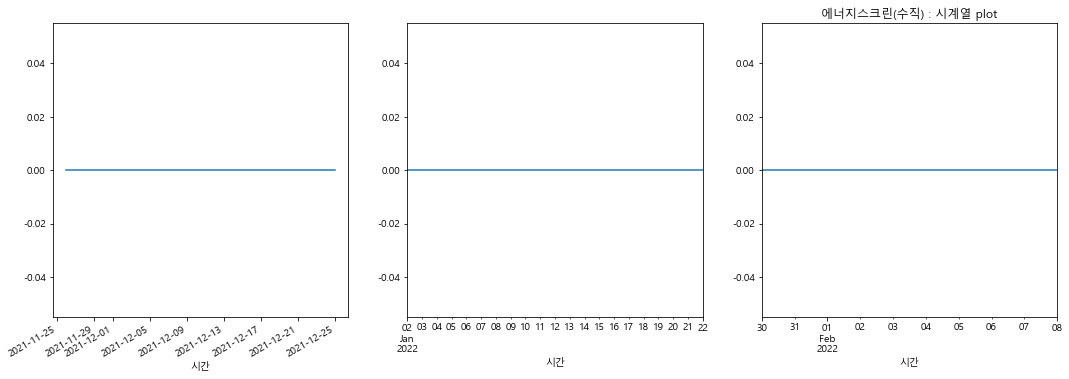

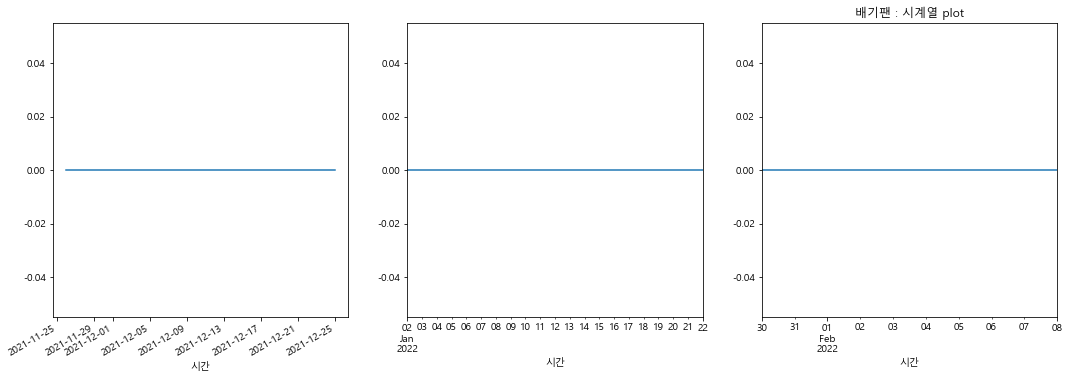

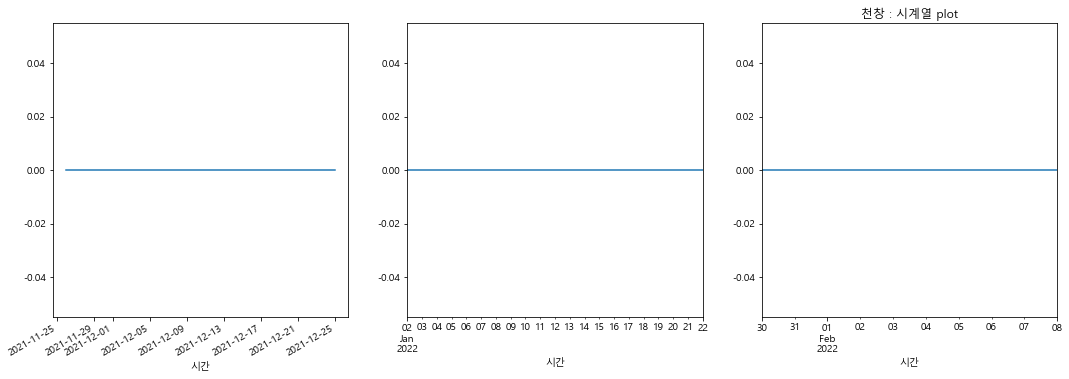

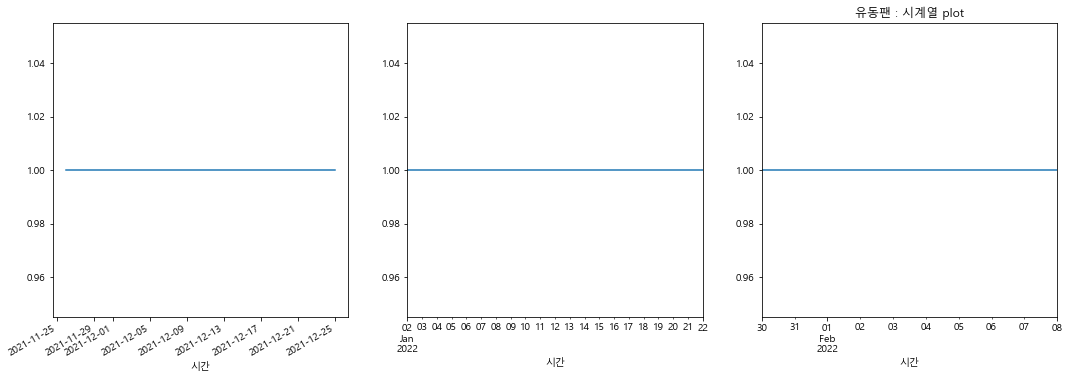

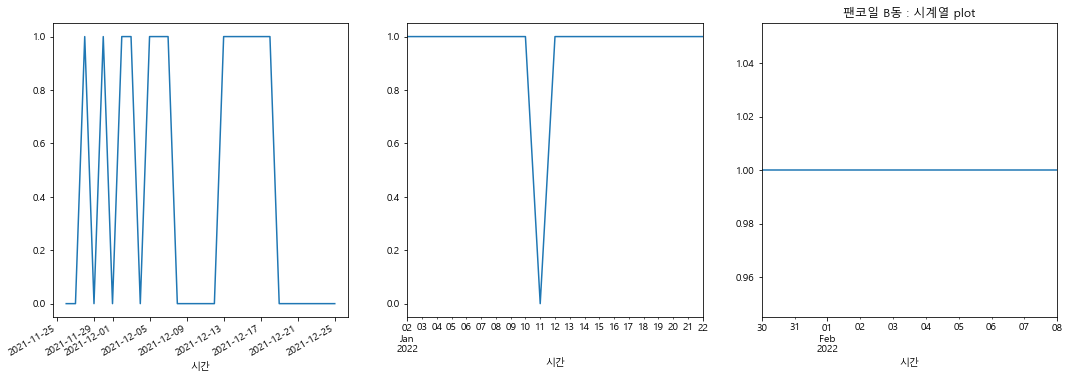

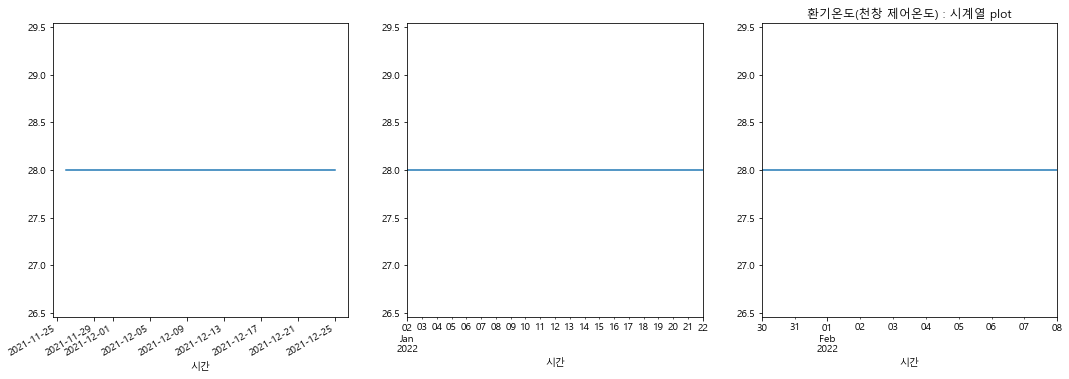

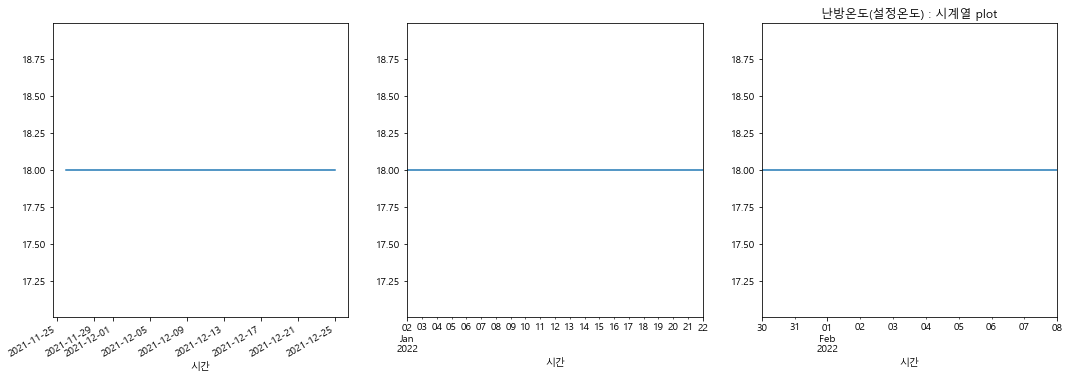

In [40]:
for col in train_df.columns[6:-1]:
    fig,ax = plt.subplots(1,3,figsize=(18,6))
    
    range3_df.set_index("시간")[col].plot(ax=ax[0],label=col)
    plt.title(col + " : 시계열 plot")
    
    range4_df.set_index("시간")[col].plot(ax=ax[1],label=col)

    
    range5_df.set_index("시간")[col].plot(ax=ax[2],label=col)
    

- 시간, 계절에 따른 범주화 변수를 추가해주면 어떨까 싶다

상관관계 확인

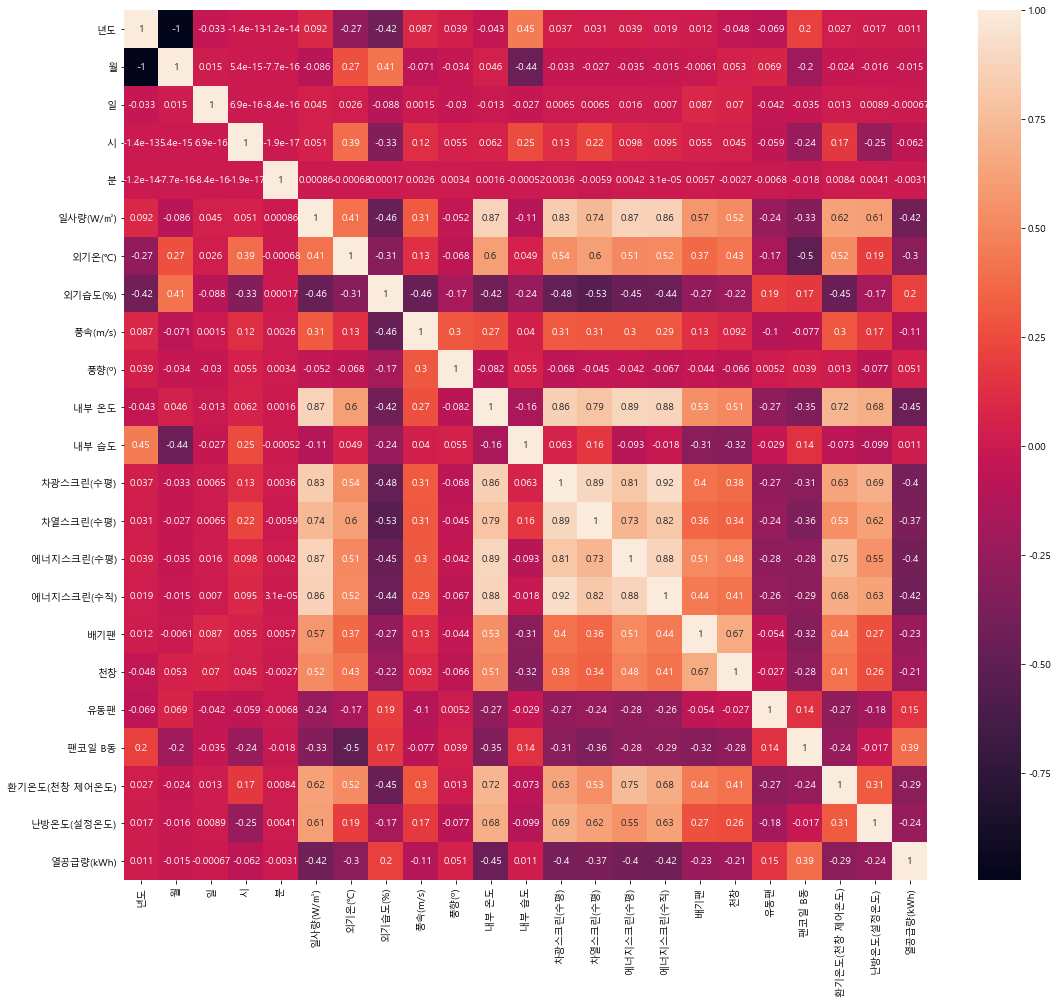

In [41]:
corr_df = train_df.corr(method='pearson')
plt.figure(figsize=(18, 16))
sns.heatmap(corr_df, annot=True)
plt.show()

# 상관관계가 기존의 열들 사이에서는 그리 높지 않게 나타남. 0.9 넘는 것 없음

### 공급량에 대한 EDA
- 평가 방법인 RMSE를 고려한 변수 단위 전환
- 1kWh -> 1000Wh

In [59]:
train_df_wh = train_df_3.copy()
train_df_wh["열공급량(Wh)"] = train_df_wh["열공급량(kWh)"] * 1000
train_df_wh.drop(["열공급량(kWh)"],axis=1,inplace=True)
train_df_wh["열공급량(Wh)"] = train_df_wh["열공급량(Wh)"].astype(int)

In [60]:
train_df_wh.columns

Index(['시간', '년월일', '년도', '월', '일', '시', '분', '일사량(W/㎡)', '외기온(℃)', '외기습도(%)',
       '풍속(m/s)', '풍향(º)', '내부 온도', '내부 습도', '차광스크린(수평)', '차열스크린(수평)',
       '에너지스크린(수평)', '에너지스크린(수직)', '배기팬', '천창', '유동팬', '팬코일 B동',
       '환기온도(천창 제어온도)', '난방온도(설정온도)', '열공급량(Wh)'],
      dtype='object')

In [61]:
train_df_wh.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(Wh)
0,2021-11-26 00:00:00,2021-11-26,2021,11,26,0,0,-2.7,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,900
1,2021-11-26 00:01:00,2021-11-26,2021,11,26,0,1,-2.9,5.8,67,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,18.0,900
2,2021-11-26 00:02:00,2021-11-26,2021,11,26,0,2,-3.0,5.7,67,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,900


월별로 차이가 있는가?
- 월별로 미세한 차이가 있어보인다

<AxesSubplot:xlabel='월', ylabel='열공급량(Wh)'>

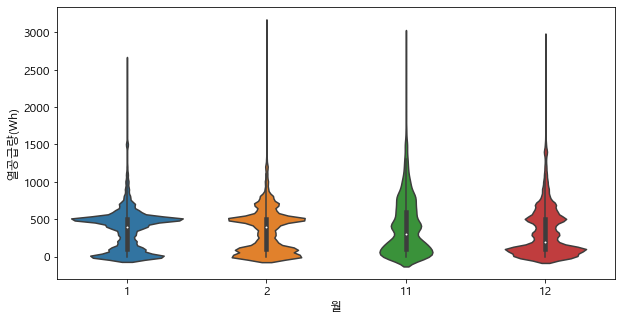

In [78]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot(x="월",y= "열공급량(Wh)", data = train_df_wh)

<AxesSubplot:xlabel='월', ylabel='열공급량(Wh)'>

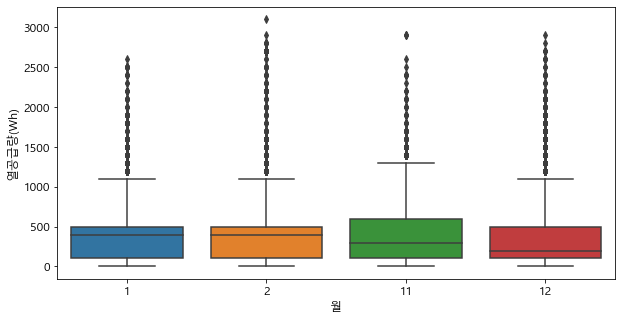

In [79]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="월",y= "열공급량(Wh)", data = train_df_wh)

시간대별로 차이도 명확해보인다
- 주로 낮 시간대에 열공급량이 적어지는 것으로 보임 -> 일사량 관련 변수를 도입해볼까?

<AxesSubplot:xlabel='시', ylabel='열공급량(Wh)'>

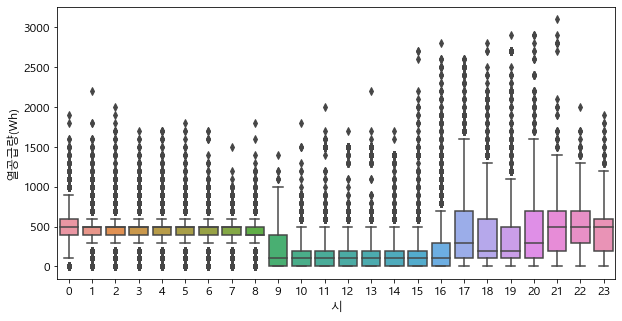

In [82]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="시",y= "열공급량(Wh)", data = train_df_wh)

Text(0.5, 1.0, '열공급량 시간별 그래프')

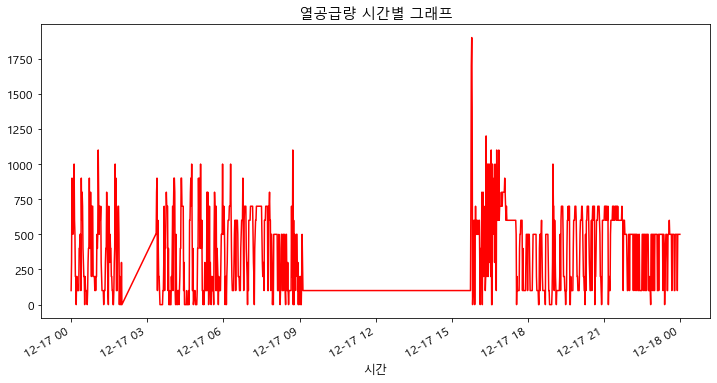

In [95]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(12,6))
    
train_df_wh[train_df_wh["년월일"] == "2021-12-17"].set_index("시간")["열공급량(Wh)"].plot(ax=ax,color="red")
    
plt.title("열공급량" + " 시간별 그래프")

Text(0.5, 1.0, '내부온도 시간별 그래프')

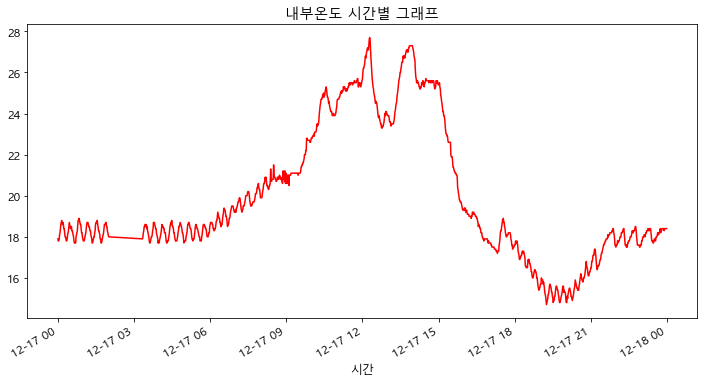

In [93]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(12,6))
    
#train_df_wh[train_df_wh["년월일"] == "2021-12-17"].set_index("시간")["열공급량(Wh)"].plot(ax=ax,color="blue")
    
train_df_wh[train_df_wh["년월일"] == "2021-12-17"].set_index("시간")["내부 온도"].plot(ax=ax,color="red")
    
plt.title("내부온도" + " 시간별 그래프")

시간대별로 열공급량이 분 단위로 어떻게 변화하는지 확인
- 2021년 12월 17일 새벽 2~3시 구간 확인
- 2시 ~ 3시 20분 사이의 데이터가 존재하지 않아서 0 에서 갑자기 500으로 증가

In [64]:
train_df_wh_hour = train_df_wh[train_df_wh["년월일"] == "2021-12-17"]
train_df_wh_hour.head(3)

,시간,년월일,년도,월,일,시,분,일사량(W/㎡),외기온(℃),외기습도(%),...,차열스크린(수평),에너지스크린(수평),에너지스크린(수직),배기팬,천창,유동팬,팬코일 B동,환기온도(천창 제어온도),난방온도(설정온도),열공급량(Wh)
30018,2021-12-17 00:00:00,2021-12-17,2021,12,17,0,0,-2.5,4.3,97,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,100
30019,2021-12-17 00:01:00,2021-12-17,2021,12,17,0,1,-2.5,4.3,97,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,300
30020,2021-12-17 00:02:00,2021-12-17,2021,12,17,0,2,-2.6,4.3,97,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,18.0,900


Text(0.5, 1.0, '열공급량 시간별 그래프')

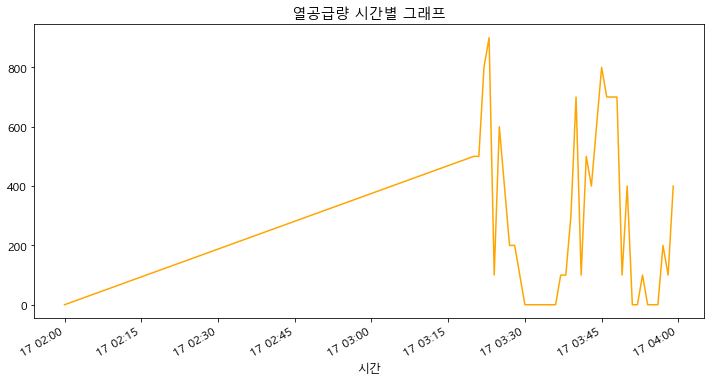

In [82]:
plt.rcParams['font.size'] = 12

fig,ax = plt.subplots(figsize=(12,6))

train_df_wh_hour[(train_df_wh_hour["시"] == 2) | (train_df_wh_hour["시"] == 3)].set_index("시간")["열공급량(Wh)"].plot(
        ax=ax,color="orange")

plt.title("열공급량" + " 시간별 그래프")

In [81]:
train_df_wh_hour[(train_df_wh_hour["시"] == 2) | (train_df_wh_hour["시"] == 3)][["열공급량(Wh)","시간"]]

,열공급량(Wh),시간
30138,0,2021-12-17 02:00:00
30218,500,2021-12-17 03:20:00
30219,500,2021-12-17 03:21:00
30220,800,2021-12-17 03:22:00
30221,900,2021-12-17 03:23:00
30222,100,2021-12-17 03:24:00
30223,600,2021-12-17 03:25:00
30224,400,2021-12-17 03:26:00
30225,200,2021-12-17 03:27:00
30226,200,2021-12-17 03:28:00


### 다중플롯 그리기

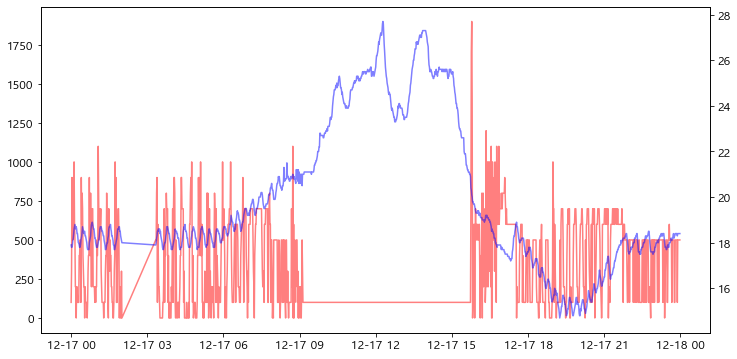

In [84]:
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig,ax = plt.subplots(figsize=(12,6))

ax.plot(train_df_wh_hour["시간"], train_df_wh_hour["열공급량(Wh)"], color = 'red', alpha = 0.5)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax1 = ax.twinx()
ax1.plot(train_df_wh_hour["시간"], train_df_wh_hour["내부 온도"], color = 'blue', alpha = 0.5)
plt.show()

9시부터 15시는 열공급량이 일정한 구간

### 데이터 저장

In [377]:
train_df.to_csv("smart_farm_train.csv",encoding="utf-8-sig",index=False)
test_df.to_csv("smart_farm_test.csv",encoding="utf-8-sig",index=False)

### 변수선택 과정
- VIF 수치 확인

### 변수 선택

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import time
import itertools

In [ ]:
## 전진 단계별 선택법
def get_stepwise(df):
    variables = df.columns[:-1].tolist() ## 설명 변수 리스트

    y = df['열공급량(kWh)'] ## 반응 변수
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = df[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = df[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            
            adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
            print(adj_r_squared,"스텝",step)
            if step > 373:
                break
        else:
            break
    return selected_variables,sv_per_step,adjusted_r_squared,steps

In [ ]:
Y = train_df_3["열공급량(kWh)"]

X =  pd.get_dummies(train_df_3.drop(["년월일","시간","열공급량(kWh)"],axis=1),
                     columns = ["년도","월","일","시","분"])


#Y = sm.add_constant(X, has_constant = "add")
X["열공급량(kWh)"] = Y
X.head(3)

In [ ]:
train_df_3.isnull().sum()

In [ ]:
a,b,c,d = get_stepwise(X)

In [ ]:
print(len(a))
print(a)

In [ ]:
len(train_df_3.columns)